# Учебный проект 8_HR-аналитика удовлетворенности персонала

## Содержание

* [Описание проекта](#описание-проекта)
* [Импорт библиотек Python](#импорт-библиотек-python)
* [Задача 1_Предсказание уровня удовлетворенности сотрудника](#задача-1_предсказание-уровня-удовлетворенности-сотрудника)
    * [Загрузка данных](#загрузка-данных)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные с `показателями анкетирования сотрудников компании`, которые были предоставлены руководством компании "Работа с заботой".

---

`Задача`

Разработать модели машинного обучения для:
1. **предсказания уровней удовлетворенности сотрудников**;
2. **предсказания увольнения сотрудников из компании**;

---

`Путь решения`

1. Собрать данные по сотрудникам в следующем ключе:
    * Данные о сотрудниках и их удовлетворенности работой в компании по результатам анкетирования:
        * Данные для обучения моделей;
        * Данные для тестирования качества моделей.
    * Данные о сотрудниках и их показателе ухода из компании:
        * Данные для обучения моделей;
        * Данные для тестирования качества моделей.
2. Провести предобработку значений в наборах данных; Провести исследовательский анализ данных для выявления закономерностей, применимых к последующей настройке моделей МО;
3. Построить модель, которая `предскажет уровень удовлетворенности сотрудников` (задача может решаться как моделями регрессии, так и моделями классификации);
4. Построить модель, которая `предскажет вероятность ухода сотрудника из компании` (задача может решаться моделями классификации);
5. Оценить качество моделей на метриках (это могут быть как стандартные метрики, так и собственные - например, SMAPE);
6. Сформировать вывод о подготовленных решениях. Предложить заказчику лучшие модели для решения обозначенных задач.

---

`Располагаемые данные`

**Данные обучающей выборки (характеристики работников и оценка удовлетворенности работников работой в компании) - train_data**

* id - уникальный идентификатор сотрудника;
* dept — отдел, в котором работает сотрудник;
* level — уровень занимаемой должности;
* workload — уровень загруженности сотрудника;
* employment_years — длительность работы в компании (в годах);
* last_year_promo — показывает, было ли повышение за последний год;
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
* salary — ежемесячная зарплата сотрудника;
* job_satisfaction_rate — уровень удовлетворенности сотрудника работой в компании, целевой признак.

**Признаки тестовой выборки (характеристики работников) - test_features**

* id - уникальный идентификатор сотрудника;
* dept — отдел, в котором работает сотрудник;
* level — уровень занимаемой должности;
* workload — уровень загруженности сотрудника;
* employment_years — длительность работы в компании (в годах);
* last_year_promo — показывает, было ли повышение за последний год;
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
* salary — ежемесячная зарплата сотрудника.

**Целевая переменная тестовой выборки (оценка удовлетворенности работников работой в компании) - test_target**

* id - уникальный идентификатор сотрудника;
* job_satisfaction_rate — уровень удовлетворенности сотрудника работой в компании, целевой признак.

**Данные обучающей выборки (характеристики работников и показатель ухода сотрудников из компании) - train_quit**
* id - уникальный идентификатор сотрудника;
* dept — отдел, в котором работает сотрудник;
* level — уровень занимаемой должности;
* workload — уровень загруженности сотрудника;
* employment_years — длительность работы в компании (в годах);
* last_year_promo — показывает, было ли повышение за последний год;
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
* salary — ежемесячная зарплата сотрудника;
* quit — зафиксирован уход сотрудника.

**Целевая переменная тестовой выборки (показатель ухода сотрудников из компании) - test_target_quit**

* id - уникальный идентификатор сотрудника;
* quit — зафиксирован уход сотрудника.

## Импорт библиотек Python <a class = 'anchor' id = 'Импорт'></a>

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для решения задач машинного обучения:
        * модели классификации;
        * метрики оценки эффективности моделей;
        * механизмы отбора данных и подбора параметров моделей;
        * механизмы подготовки данных;
        * механизмы построения пайплайнов;
        * механизм заполнения пустых значений;
        * механизм анализха влияния признаков.
2. Инициализация переменных-констант для последующего использования на этапе построения моделей МО;
3. Формирование вывода по итогам данного этапа.

In [1]:
# импорт библиотек python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# установка размеров для последующих графиков в проекте
plt.rcParams['figure.figsize'] = (10, 5)


# модели классификации
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# метрики оценки эффективности моделей
from sklearn.metrics import (recall_score,
                             precision_score,
                             confusion_matrix,
                             fbeta_score,
                             roc_auc_score,
                             make_scorer)

# механизмы отбора данных и подбора параметров моделей
from sklearn.model_selection import GridSearchCV

# механизмы подготовки данных
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   LabelEncoder)

# механизмы построения пайплайнов
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# механизм заполнения пустых значений
from sklearn.impute import SimpleImputer

# механизм анализха влияния признаков
import shap

c:\Users\k.storozhuk\Desktop\YandexPraktikum_projects\.py_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# инициализация констант для дальнейшего использования в проекте
# инициализация переменной RANDOM_STATE для фиксирования "случайности"
RANDOM_STATE = 42

**Вывод**

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для решения задач машинного обучения:
        * LogisticRegression - модель логистической регрессии;
        * KNeighborsClassifier - модель k-ближайших соседей;
        * SVC - машина опорных векторов;
        * DecisionTreeClassifier - модель дерева принятия решений для классификации данных;
        * DecisionTreeRegressor - модель дерева принятия решений для задач регрессии;
        * метрики оценки эффективности моделей классификации;
        * train_test_split - механизм разделения данных;
        * GridSearchCV - механизм поиска гиперпараметров с перебором по "сетке";
        * StandardScaler - стандартизация данных;
        * MinMaxScaler - нормализация данных;
        * OneHotEncoder - one-hot кодирование категориальных признаков;
        * LabelEncoder - кодирование значений целевой переменной;
        * Pipeline - механизм построения пайплайнов;
        * ColumnTransformer - механизм объединения шагов пайплайна;
        * SimpleImputer - механизм заполнения пустых значений;
        * SHAP - механизм анализа важности признаков.
2. Инициализирована переменная **RANDOM_STATE** для фиксирования "случайности".

## Задача 1_Предсказание уровня удовлетворенности сотрудника <a class = 'anchor' id = 'Задача1'></a>

### Загрузка данных <a class = 'anchor' id = 'Задача1_Загрузка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов:
    * **train_data**;
    * **test_features**;
    * **test_target**.
2. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
    * визуализация распределений количественных показателей.
3. Формирование вывода по итогам данного этапа.

In [3]:
# загрузка данных в рабочую среду

try:
    train_data = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/train_job_satisfaction_rate.csv') # тренировочная выборка
    test_features = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/test_features.csv') # входные признаки тестовой выборки
    test_target = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/test_target_job_satisfaction_rate.csv') # целевой признак тестовой выборки
except:
    train_data = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('/datasets/test_features.csv')
    test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
# инициализация пользовательской функции для первичного изучения содержимого наборов данных
def  first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print('Общая информация о наборе')
    print(df.info())
    print()

In [5]:
# инициализация пользовательской функции построения распределений количественных непрерывных показателей
def num_distribution(df : pd.DataFrame, column : str, bins : int):
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения признака {column}')
    plt.ylabel(f'Частота значений признака')
    plt.title(f'Гистограмма значений {column}', fontsize = 10)
    sns.histplot(df, x = column, bins = bins)
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения признака {column}')
    plt.title(f'Диаграмма размаха значений {column}', fontsize = 10)
    sns.boxplot(df, x = column)
    plt.grid(False)
    plt.show()

In [6]:
# инициализация пользовательской функции построения диаграмм количественных дискретных показателей
def num_countplot(df : pd.DataFrame, column : str):
    sns.countplot(df, x = column)
    plt.title(f'Столбчатая диаграмма значений признака {column}', fontsize = 12)
    plt.xlabel(f'Признак {column}')
    plt.ylabel(f'Количество значений признака')
    plt.show()

Структура набора данных train_data


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
None



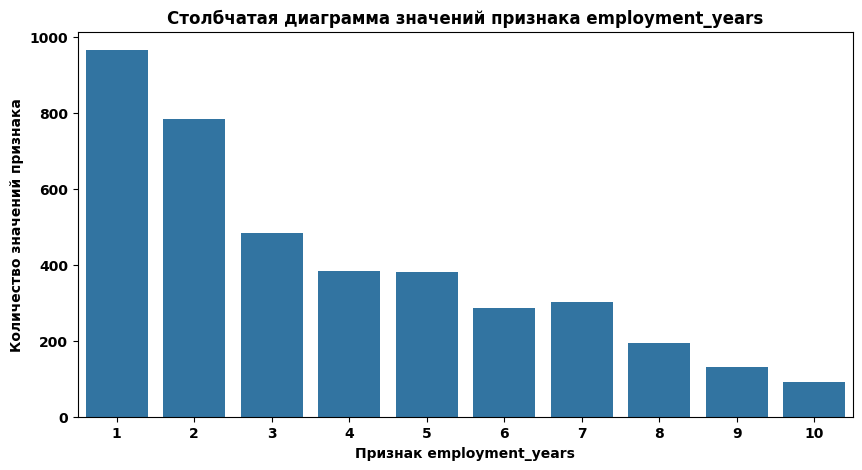

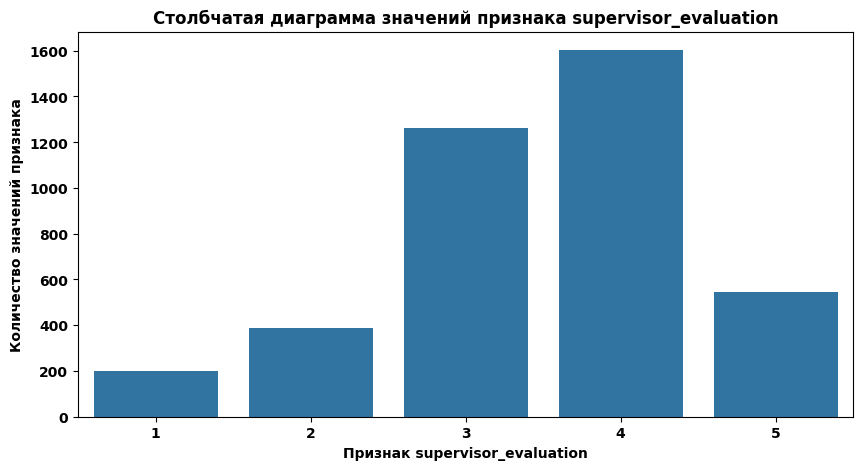

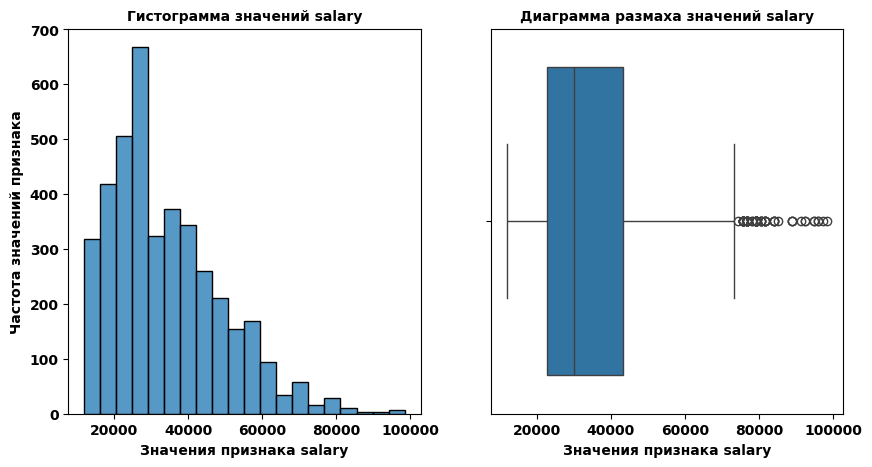

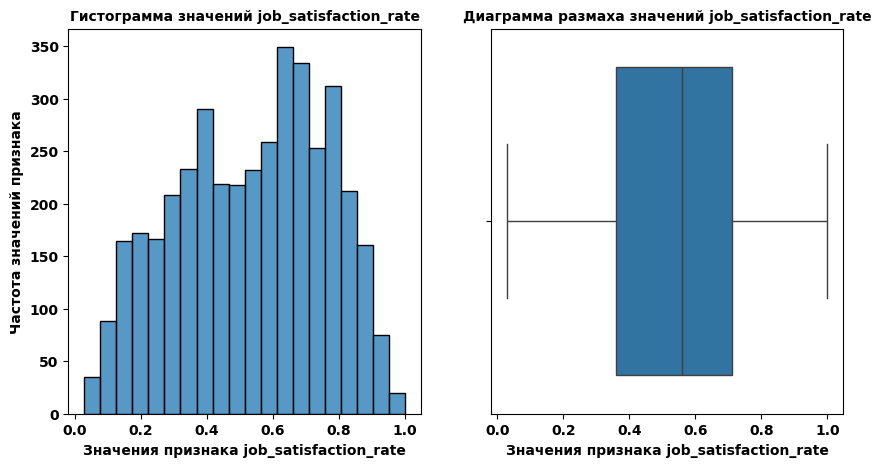

In [7]:
# вывод на экран параметров датасета 'train_data'
first_meeting(train_data, 'train_data')

# вывод на экран графиков дискретных количественных величин по набору 'train_data'
for col in ['employment_years', 'supervisor_evaluation']:
    num_countplot(train_data, col)

# вывод на экран графиков непрерывных количественных величин по набору 'train_data'
for col in ['salary', 'job_satisfaction_rate']:
    num_distribution(train_data, col, 20)

Структура набора данных test_features


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB
None



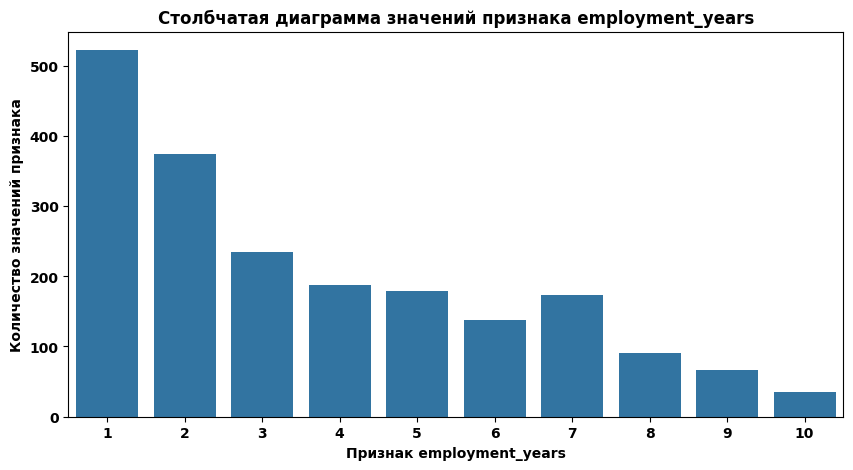

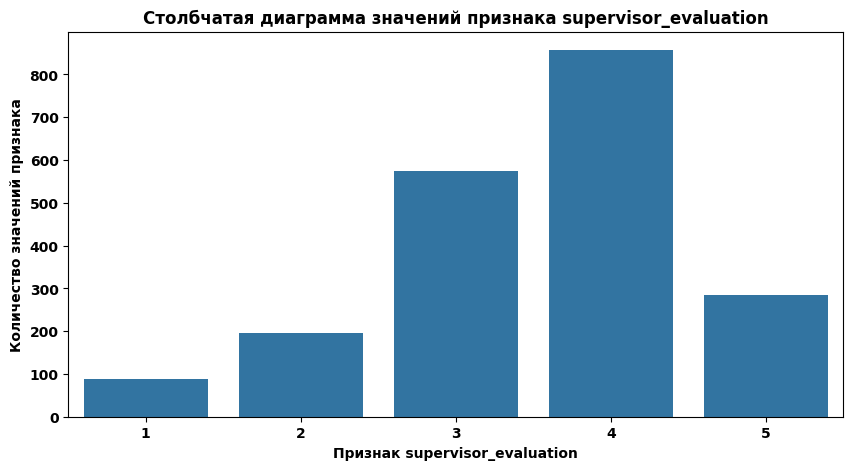

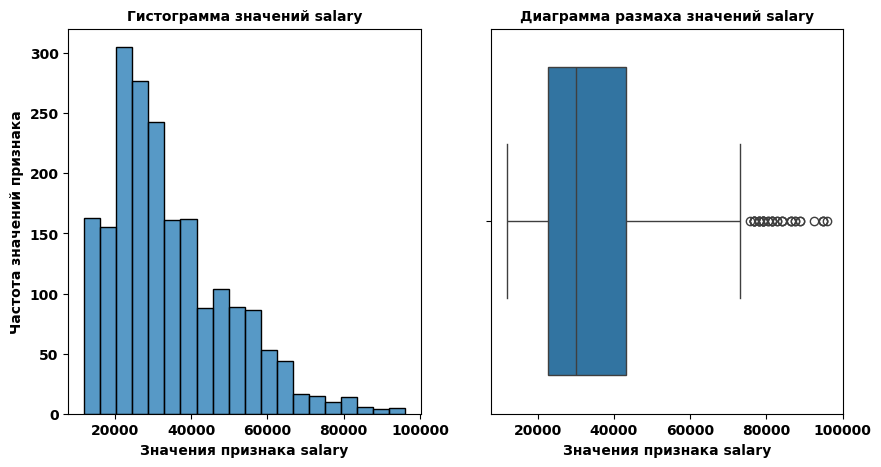

In [8]:
# вывод на экран параметров датасета 'test_features'
first_meeting(test_features, 'test_features')

# вывод на экран графиков дискретных количественных величин по набору 'test_features'
for col in ['employment_years', 'supervisor_evaluation']:
    num_countplot(test_features, col)

# вывод на экран графиков непрерывных количественных величин по набору 'test_features'
num_distribution(test_features, 'salary', 20)

Структура набора данных test_target


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None



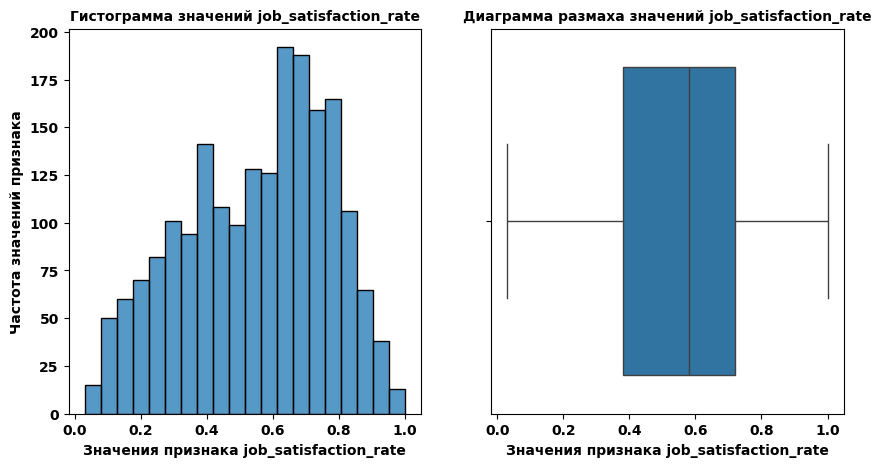

In [9]:
# вывод на экран параметров датасета 'test_target'
first_meeting(test_target, 'test_target')

# вывод на экран графиков непрерывных количественных величин по набору 'test_target'
num_distribution(test_target, 'job_satisfaction_rate', 20)

**Вывод**

1. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные в соответствие с названиями загружаемых датасетов:
    * `train_data`;
    * `test_features`;
    * `test_target`.
2. Выведены на экран параметры датасетов:
    * `train_data`
        * В наборе данных **имеются пустые значения**:
            * 6 значений - в признаке **dept**;
            * 4 значения - в признаке **level**.
        * Типы данных **соответствуют сущностям значений**, приведенным в столбцах;
        * Названия столбцов **соответствуют формату snake_case**;
        * Наблюдаются выбросы по признаку **salary** - необходимо изучить данные случаи на этапе исследовательского анализа;
        * Аномальные значения по признаку **job_satisfaction_rate** не наблюдаются - все значения лежат в диапазоне от 0 до 1.
    * `test_features`
        * В наборе данных **имеются пустые значения**:
            * 2 значения - в признаке **dept**;
            * 1 значение - в признаке **level**.
        * Типы данных **соответствуют сущностям значений**, приведенным в столбцах;
        * Названия столбцов **соответствуют формату snake_case**;
        * Наблюдаются выбросы по признаку **salary** - необходимо изучить данные случаи на этапе исследовательского анализа.
    * `test_target`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Названия столбцов **соответствуют формату snake_case**;
        * Аномальные значения по признаку **job_satisfaction_rate** не наблюдаются - все значения лежат в диапазоне от 0 до 1.

### Предобработка данных <a class = 'anchor' id = 'Задача1_Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Проверка датасетов на дубликаты:
    * Явные дубликаты;
    * Неявные дубликаты.
2. Формирование вывода по итогам данного этапа.

In [10]:
# инициализация пользовательской функции проверки уникальных значений по столбцам датасета
def unique_values(df : pd.DataFrame):
    df = df.select_dtypes(exclude = 'number')
    for column in df.columns:
        print(f'Столбец {column}: {list(df[column].unique())}')

In [11]:
# инициализация пользовательской функции по замене значений в категориальных столбцах
def replace_values(df : pd.DataFrame, column : str, old_value : str, new_value : str):
    df.loc[df[column] == old_value, column] = new_value

In [12]:
# проверка набора 'train_data' на уникальные значения
print('Уникальные значения по категориальным столбцам train_data')
unique_values(train_data)

Уникальные значения по категориальным столбцам train_data
Столбец dept: ['sales', 'hr', 'technology', 'purchasing', 'marketing', nan]
Столбец level: ['junior', 'middle', 'sinior', nan]
Столбец workload: ['medium', 'high', 'low']
Столбец last_year_promo: ['no', 'yes']
Столбец last_year_violations: ['no', 'yes']


In [13]:
# проверка набора 'test_features' на уникальные значения
print('Уникальные значения по категориальным столбцам test_features')
unique_values(test_features)

Уникальные значения по категориальным столбцам test_features
Столбец dept: ['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' ']
Столбец level: ['junior', 'middle', 'sinior', nan]
Столбец workload: ['medium', 'low', 'high', ' ']
Столбец last_year_promo: ['no', 'yes']
Столбец last_year_violations: ['no', 'yes']


In [14]:
# замена значений в датасетах
replace_values(train_data, 'level', 'sinior', 'senior')
replace_values(test_features, 'level', 'sinior', 'senior')
replace_values(test_features, 'dept', ' ', np.nan)
replace_values(test_features, 'workload', ' ', np.nan)

In [15]:
# инициализация переменных 'data_names_list' и 'data_list' для хранения списка названий наборов данных и самих наборов данных
data_names_list = ['train_data', 'test_features', 'test_target']
data_list = [train_data, test_features, test_target]

In [16]:
# проверка на наличие явных дубликатов
counter = 0

print('Проверка на наличие явных дубликатов')
for df in data_list:
    print(f'Число явных дубликатов в {data_names_list[counter]}: {df.duplicated().sum()}')
    counter += 1

Проверка на наличие явных дубликатов
Число явных дубликатов в train_data: 0
Число явных дубликатов в test_features: 0
Число явных дубликатов в test_target: 0


**Вывод по промежуточному этапу**

Явных дубликатов по строкам наборов данных не обнарежно (при полном сравнении строк). Однако необходимо проверить наличие явных дубликатов по набору столбцов.

**По определению, не может быть двух одинаковых id сотрудников в компании**. Можно проверить наличие дубликатов по следующим условиям:
* id сотрудника;
* id сотрудника и департамент;
* id сотрудника, департамент и уровень квалификации.

Эти данные точно позволят идентифицировать сотрудника компании и проверить, есть ли среди объектов дублирующиеся

In [17]:
# инициализация пользовательской функции дополнительной проверки на дубликаты
def duplicates_checking(df : pd.DataFrame):
    if df.duplicated(subset = ['id']).sum() > 0 or df.duplicated(subset = ['id', 'dept']).sum() > 0 or df.duplicated(subset = ['id', 'dept', 'level']).sum() > 0:
        print('Первоначальная проверка не пройдена. В наборе есть дубликаты')
    else:
        print('Проверка на дубликаты пройдена. Дублирующиеся значения отсутствуют')

In [18]:
# повторная проверка на дубликаты
duplicates_checking(train_data)
duplicates_checking(test_features)

Проверка на дубликаты пройдена. Дублирующиеся значения отсутствуют
Проверка на дубликаты пройдена. Дублирующиеся значения отсутствуют


**Вывод**

1. Выполнена проверка наборов данных на дубликаты:
    * **Явные дубликаты** - явные дубликаты **не обнаружены**; 
    * Неявные дубликаты:
        * Столбец **level** в наборе `train_data` - преобразованы значения "sinior" на "senior";
        * Столбец **level** в наборе `test_features` - преобразованы значения "sinior" на "senior";
        * Столбец **workload** в наборе `market_time` - преобразованы значения " " на "np.nan";
        * Столбец **dept** в наборе `market_time` - преобразованы значения " " на "np.nan";
2. Данные прошли этап предобработки и готовы к исследовательскому анализу.

### Исследовательский анализ данных <a class = 'anchor' id = 'Задача1_Исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Вывод на экран основной статистической информации по текущим версиям наборов данных;
2. Исследование соотношения количества значений качественных показателей;
3. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**;
4. Формирование вывода по итогам этапа.

In [19]:
# вывод на экран основных статистик по наборам данных
counter = 0

for df in data_list:
    print(f'Основная статистическая информация по набору {data_names_list[counter]}')
    display(df.iloc[:, 1:].describe())
    counter += 1
    print()

Основная статистическая информация по набору train_data


,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000



Основная статистическая информация по набору test_features


,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000



Основная статистическая информация по набору test_target


,job_satisfaction_rate
count,2000.00000
mean,0.54878
std,0.22011
min,0.03000
25%,0.38000
50%,0.58000
75%,0.72000
max,1.00000


**Вывод по промежуточному этапу**:

Набор `train_data` характеризуется следующими статистическими показателями:

* **employment_years - длительность работы в компании (в годах)**:
    * Среднее значение - 3.7;
    * Минимальное значение - 1.0;
    * Максимальное значение - 10.0;
    * Стандартное отклонение - 2.5.
* **supervisor_evaluation - оценка качества работы сотрудника, которую дал руководитель**:
    * Среднее значение - 3.5;
    * Минимальное значение - 1.0;
    * Максимальное значение - 5.0;
    * Стандартное отклонение - 1.0.
* **salary - ежемесячная зарплата сотрудника**:
    * Среднее значение - 33 926.7;
    * Минимальное значение - 12 000.0;
    * Максимальное значение - 98 400.0;
    * Стандартное отклонение - 14 900.7. **Данные достаточно вариативны** - необходимо изучить, каким отделам принадлежат те или иные уровни зарплат.
* **job_satisfaction_rate - уровень удовлетворенности сотрудника работой в компании**:
    * Среднее значение - 0.53;
    * Минимальное значение - 0.03;
    * Максимальное значение - 1.0;
    * Стандартное отклонение - 0.23.

Набор `test_features` характеризуется следующими статистическими показателями:

* **employment_years - длительность работы в компании (в годах)**:
    * Среднее значение - 3.67;
    * Минимальное значение - 1.0;
    * Максимальное значение - 10.0;
    * Стандартное отклонение - 2.5.
* **supervisor_evaluation - оценка качества работы сотрудника, которую дал руководитель**:
    * Среднее значение - 3.5;
    * Минимальное значение - 1.0;
    * Максимальное значение - 5.0;
    * Стандартное отклонение - 1.0.
* **salary - ежемесячная зарплата сотрудника**:
    * Среднее значение - 34 066.8;
    * Минимальное значение - 12 000.0;
    * Максимальное значение - 96 000.0;
    * Стандартное отклонение - 15 398.4. **Данные достаточно вариативны** - необходимо изучить, каким отделам принадлежат те или иные уровни зарплат.

Набор `test_target` характеризуется следующими статистическими показателями:

* **job_satisfaction_rate - уровень удовлетворенности сотрудника работой в компании**:
    * Среднее значение - 0.55;
    * Минимальное значение - 0.03;
    * Максимальное значение - 1.0;
    * Стандартное отклонение - 0.22.

In [20]:
# инициализация пользовательской функции по формированию вывода информации

def display_info(df: pd.DataFrame, column_name: str, title: str, xlabel: str, kind_of_plot : str):
# построение визуализации по выбранной метрике
    plt.title(title, fontsize = 12)
    if kind_of_plot == 'pie':
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5), autopct='%1.0f%%'))
    else:
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5)))
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlabel(xlabel)
    plt.show()

# построение сводной таблицы по выбранной метрике
    pivot_data = (df[column_name]
                  .value_counts()
                  .sort_values(ascending=False)
                  .to_frame())
    pivot_data['share_of_employers'] = round(pivot_data['count'] / pivot_data['count'].sum() * 100, 2)
    pivot_data.columns = ['count_of_employers', 'share_of_employers']
    display(pivot_data)

In [21]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int, feature_xlabel : str):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределения значений по метрике: {feature_xlabel}', fontsize = 10)
    plt.xlabel(feature_xlabel)
    plt.ylabel('Количество значений по метрике')
    plt.legend(bbox_to_anchor = (1, 0.6))
    plt.show()

    # вывод статистических метрик на экран
    print('Верхняя допустимая граница значений:', upper_bound)
    print('Нижняя допустимая граница значений:', lower_bound)
    print('Медианное значение:', data[feature].median())
    print('Среднее значение:', round(data[feature].mean(), 2))

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

#### Анализ набора обучающих данных <a class = 'anchor' id = 'Задача1_Исследование_ОбучающиеДанные'></a>

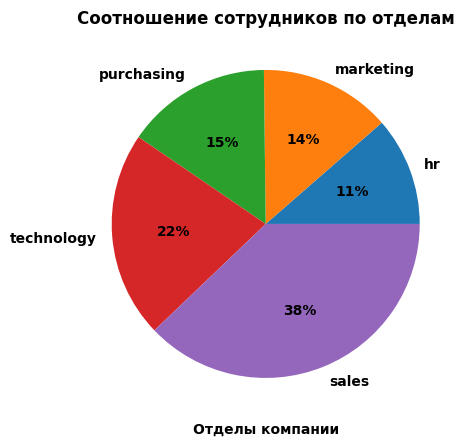

,count_of_employers,share_of_employers
dept,,
sales,1512,37.86
technology,866,21.68
purchasing,610,15.27
marketing,550,13.77
hr,456,11.42


In [22]:
# построение пай-чарта по соотношению сотрудников в контексте отделов
display_info(train_data, 'dept', 'Соотношение сотрудников по отделам', 'Отделы компании', 'pie')

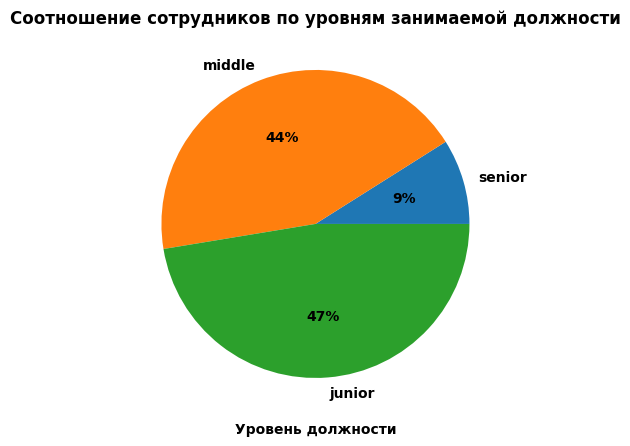

,count_of_employers,share_of_employers
level,,
junior,1894,47.40
middle,1744,43.64
senior,358,8.96


In [23]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(train_data, 'level', 'Соотношение сотрудников по уровням занимаемой должности', 'Уровень должности', 'pie')

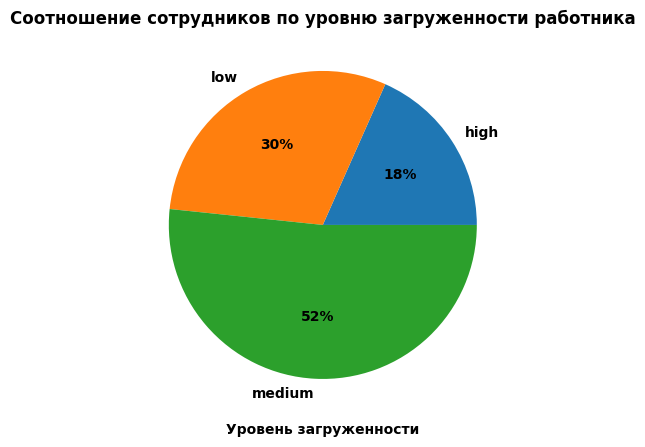

,count_of_employers,share_of_employers
workload,,
medium,2066,51.65
low,1200,30.00
high,734,18.35


In [24]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(train_data, 'workload', 'Соотношение сотрудников по уровню загруженности работника', 'Уровень загруженности', 'pie')

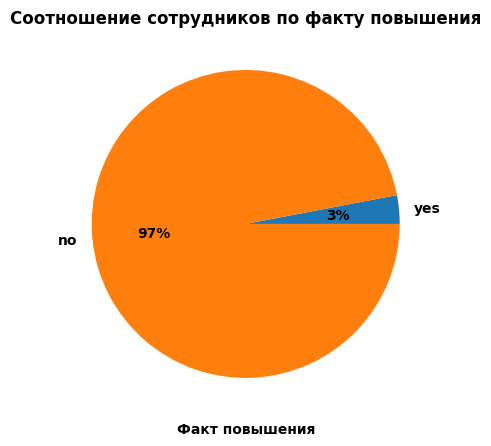

,count_of_employers,share_of_employers
last_year_promo,,
no,3880,97.0
yes,120,3.0


In [25]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(train_data, 'last_year_promo', 'Соотношение сотрудников по факту повышения', 'Факт повышения', 'pie')

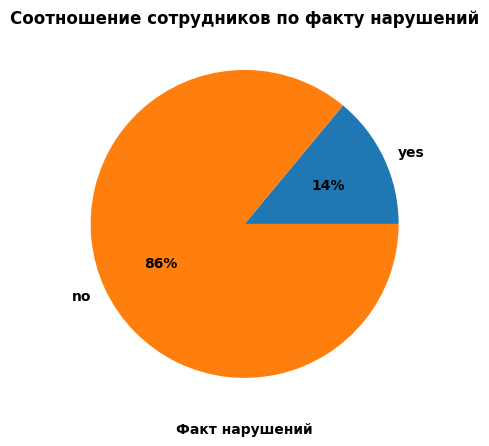

,count_of_employers,share_of_employers
last_year_violations,,
no,3441,86.02
yes,559,13.98


In [26]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(train_data, 'last_year_violations', 'Соотношение сотрудников по факту нарушений', 'Факт нарушений', 'pie')

**Вывод по промежуточному этапу**

`train_data`

* Большая часть сотрудников (60%) работает в отделах **sales** и **technology**: 38% и 22%, соответственно;
* Наиболее часто встречающиеся должности: **junior** и **middle** - 47% и 44%, соответственно;
* Большая часть сотрудников имеет **среднюю загруженность** - 52%;
* 97% сотрудников **не получили** повышение за прошлый год;
* 86% сотрудников **не нарушали** правила компании за прошлый год.

In [27]:
# вывод на экран строк с пропущенными значениями по признаку 'dept'
train_data[train_data['dept'].isna()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [28]:
# вывод на экран строк с пропущенными значениями по признаку 'dept'
train_data[train_data['level'].isna()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71


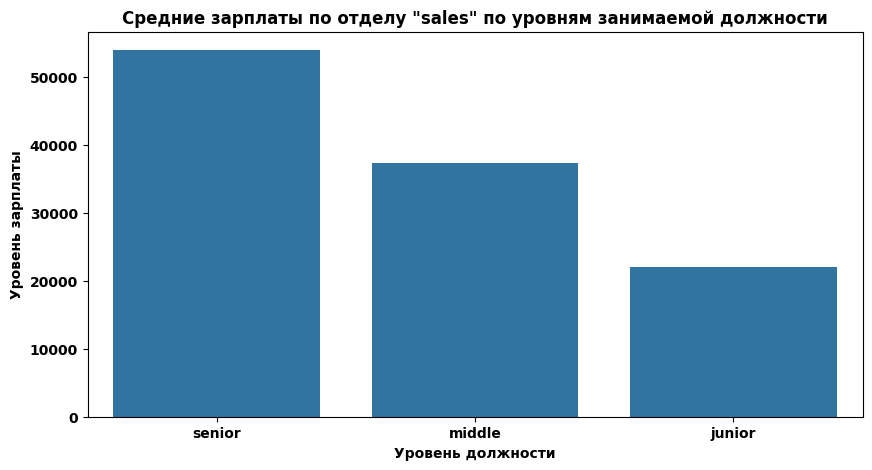

Стандартные отклонения зарплат в зависимости от уровня занимаемой должности
level
junior     6282.59
middle    11232.94
senior    13447.40
Name: salary, dtype: float64


In [29]:
# визуализация средних зарплат по отделу 'sales' по уровням занимаемой должности
sns.barplot(data = train_data.query('dept == "sales"'), order = ['senior', 'middle', 'junior'], x = 'level', y = 'salary', estimator='mean', errorbar = None)
plt.title('Средние зарплаты по отделу "sales" по уровням занимаемой должности', fontsize = 12)
plt.xlabel('Уровень должности')
plt.ylabel('Уровень зарплаты')
plt.show()

print('Стандартные отклонения зарплат в зависимости от уровня занимаемой должности')
print(round(train_data.query('dept == "sales"').groupby('level')['salary'].std(),2))

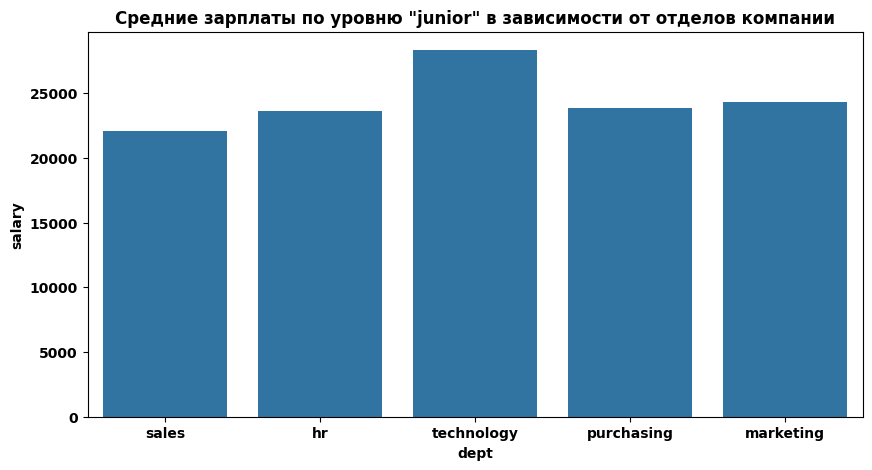

Стандартные отклонения зарплат по уровню "junior" в зависимости от отделов компании
dept
hr            6302.18
marketing     6943.51
purchasing    6513.12
sales         6282.59
technology    8202.76
Name: salary, dtype: float64


In [30]:
# визуализация средних зарплат по уровню 'junior' по отделам компании
sns.barplot(data = train_data[(train_data['level'] == "junior") & (train_data['employment_years'] <= 5)], x = 'dept', y = 'salary', estimator='mean', errorbar = None)
plt.title('Средние зарплаты по уровню "junior" в зависимости от отделов компании', fontsize = 12)
plt.show()

print('Стандартные отклонения зарплат по уровню "junior" в зависимости от отделов компании')
print(round(train_data[(train_data['level'] == "junior") & (train_data['employment_years'] <= 5)].groupby('dept')['salary'].std(),2))

**Вывод по промежуточному этапу**

Анализ пропущенных значений по набору `train_data` показал, что:
1. Пропущенные значения по признаку **level** можно заменить на 'junior'. Уровень зарплат - **salary** - и стаж работы - **employment years** - формируют картину, что представленные сотрудники имеют уровень 'junior'. Анализ стандартных отклонений зарплат в разрезе уровней так же подтверждает эту догадку;
2. Заполнение пустых значений по признаку **dept** представляется более сложной задачей, так как здесь стоит о вопрос о точечном заполнении (часть строк - один отдел, строка - другой отдел и т.д.). Подобное ручное заполнение не подходит под вводную о том, что обработку пустых значений необходимо выполнить в пайплайне, поэтому предлагается далее заменить пустоты на значение 'unknown'.

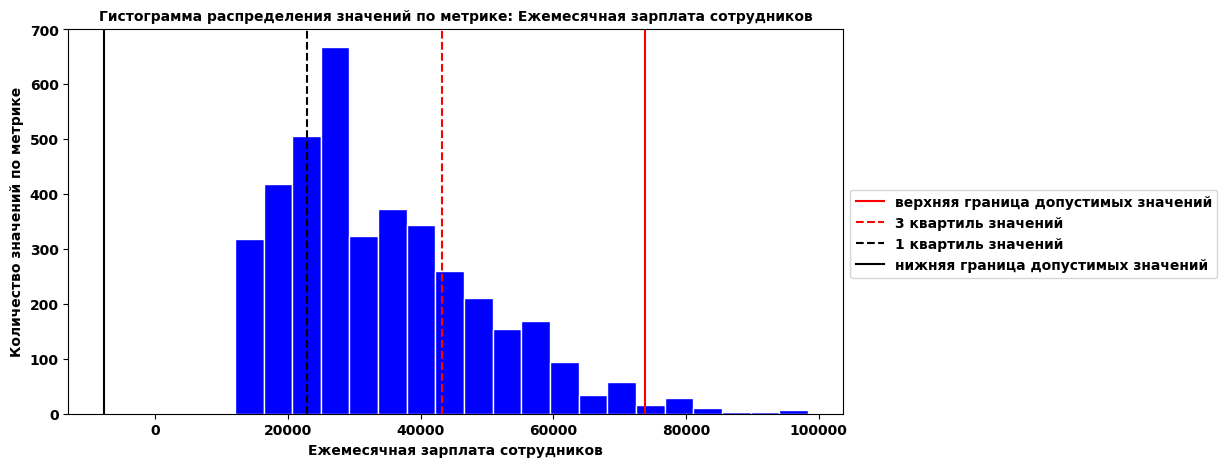

Верхняя допустимая граница значений: 73800.0
Нижняя допустимая граница значений: -7800.0
Медианное значение: 30000.0
Среднее значение: 33926.7
Доля значений, выходящих за верхнюю границу: 1.50%
Доля значений, выходящих за нижнюю границу: 0.00%


In [31]:
# построение  гистограммы распределения значений по признаку 'salary'
histogram_plotting(train_data, 'salary', 20, 10, 5, 'Ежемесячная зарплата сотрудников')

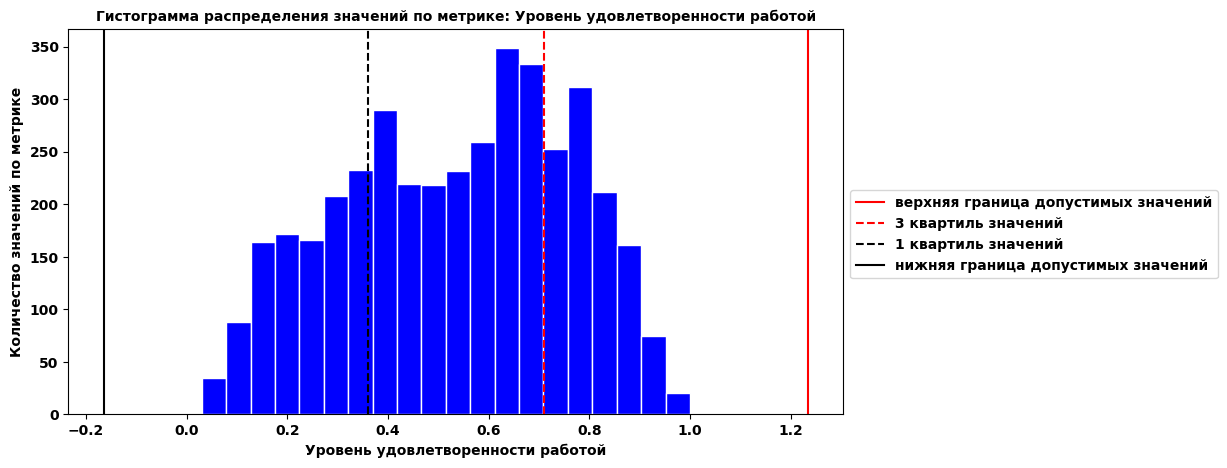

Верхняя допустимая граница значений: 1.2349999999999999
Нижняя допустимая граница значений: -0.16499999999999992
Медианное значение: 0.56
Среднее значение: 0.53
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [32]:
# построение  гистограммы распределения значений по признаку 'job_satisfaction_rate'
histogram_plotting(train_data, 'job_satisfaction_rate', 20, 10, 5, 'Уровень удовлетворенности работой')

In [33]:
# вывод на экран информации о сотрудниках с большими размерами зарплат
print('Уровень должностей сотрудников с высокими зарплатами:', list(train_data[train_data['salary'] > 75_000]['level'].unique()))
print('Уроовень рабочей загрузки сотрудников:', list(train_data[train_data['salary'] > 75_000]['workload'].unique()))

Уровень должностей сотрудников с высокими зарплатами: ['senior']
Уроовень рабочей загрузки сотрудников: ['high']


**Вывод по промежуточному этапу**

Анализ количественных показателей по набору `train_data` показал, что:
1. Обнаруженные высокие значения по признаку **salary не являются аномалиями** - нет нужды в их исключении из набора данных;
2. Значения по признаку **job_satisfaction_rate** находятся в допустимом диапазоне значений - от 0 до 1.

#### Анализ набора тестовых данных <a class = 'anchor' id = 'Задача1_Исследование_ТестовыеДанные'></a>

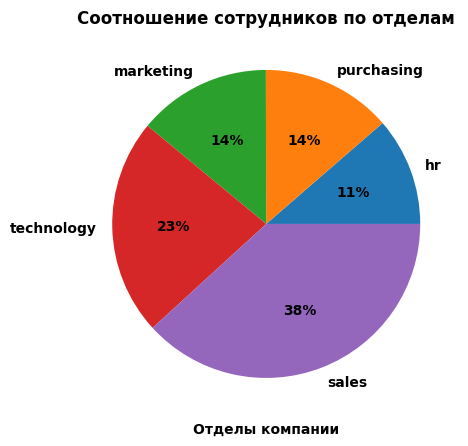

,count_of_employers,share_of_employers
dept,,
sales,763,38.21
technology,455,22.78
marketing,279,13.97
purchasing,273,13.67
hr,227,11.37


In [34]:
# построение пай-чарта по соотношению сотрудников в контексте отделов
display_info(test_features, 'dept', 'Соотношение сотрудников по отделам', 'Отделы компании', 'pie')

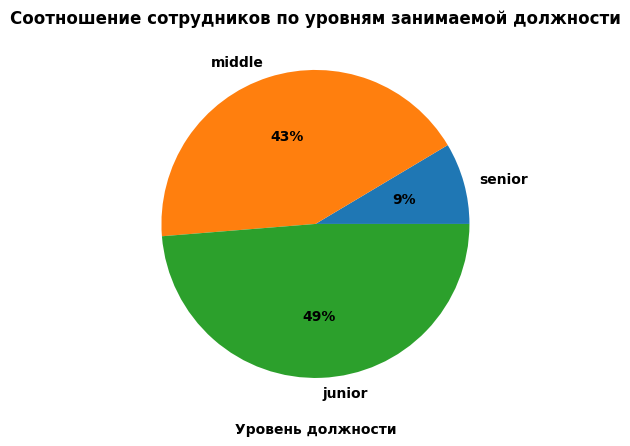

,count_of_employers,share_of_employers
level,,
junior,974,48.72
middle,854,42.72
senior,171,8.55


In [35]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(test_features, 'level', 'Соотношение сотрудников по уровням занимаемой должности', 'Уровень должности', 'pie')

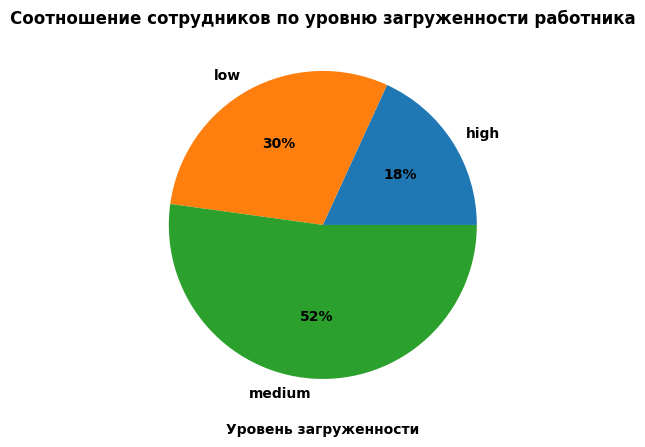

,count_of_employers,share_of_employers
workload,,
medium,1043,52.18
low,593,29.66
high,363,18.16


In [36]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(test_features, 'workload', 'Соотношение сотрудников по уровню загруженности работника', 'Уровень загруженности', 'pie')

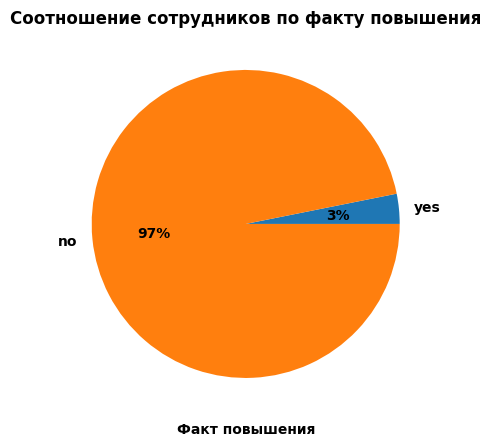

,count_of_employers,share_of_employers
last_year_promo,,
no,1937,96.85
yes,63,3.15


In [37]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(test_features, 'last_year_promo', 'Соотношение сотрудников по факту повышения', 'Факт повышения', 'pie')

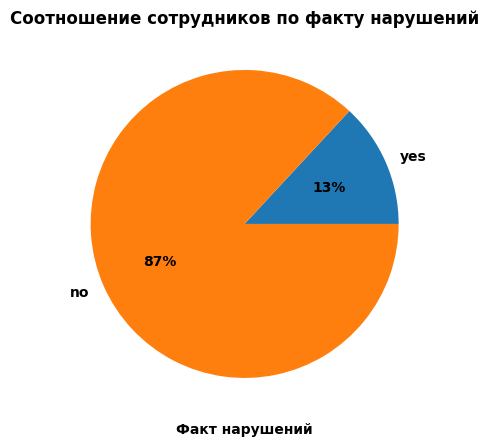

,count_of_employers,share_of_employers
last_year_violations,,
no,1738,86.9
yes,262,13.1


In [38]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(test_features, 'last_year_violations', 'Соотношение сотрудников по факту нарушений', 'Факт нарушений', 'pie')

**Вывод по промежуточному этапу**

`test_features`

* Большая часть сотрудников (60%) работает в отделах **sales** и **technology**: 38% и 22%, соответственно;
* Наиболее часто встречающиеся должности: **junior** и **middle** - 49% и 43%, соответственно;
* Большая часть сотрудников имеет **среднюю загруженность** - 52%;
* 97% сотрудников **не получили** повышение за прошлый год;
* 87% сотрудников **не нарушали** правила компании за прошлый год.

Качественные признаки набора `test_features` **количественно повторяют то же соотношение**, что и в наборе `train_data`.

In [39]:
# вывод на экран строк с пропущенными значениями по признаку 'dept'
test_features[test_features['dept'].isna()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
1196,832342,NaN,junior,medium,1,no,no,4,28800
1699,822186,NaN,middle,medium,3,no,no,4,38400


In [40]:
# вывод на экран строк с пропущенными значениями по признаку 'level'
test_features[test_features['level'].isna() == True]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
312,471990,sales,NaN,low,1,no,no,3,12000


In [41]:
# вывод на экран строк с пропущенными значениями по признаку 'workload'
test_features[test_features['workload'].isna() == True]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,NaN,4,no,no,4,28800


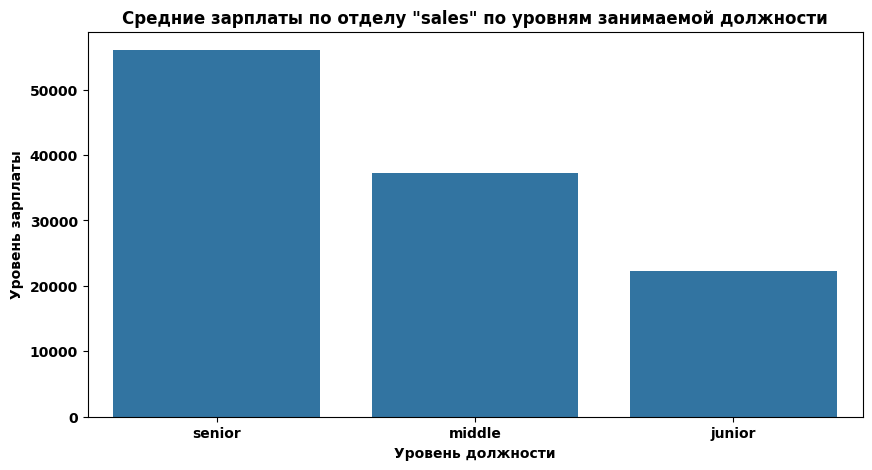

Стандартные отклонения зарплат в зависимости от уровня занимаемой должности
level
junior     6164.47
middle    11977.31
senior    14777.99
Name: salary, dtype: float64


In [42]:
# визуализация средних зарплат по отделу 'sales' по уровням занимаемой должности
sns.barplot(data = test_features.query('dept == "sales"'), order = ['senior', 'middle', 'junior'], x = 'level', y = 'salary', estimator='mean', errorbar = None)
plt.title('Средние зарплаты по отделу "sales" по уровням занимаемой должности', fontsize = 12)
plt.xlabel('Уровень должности')
plt.ylabel('Уровень зарплаты')
plt.show()

print('Стандартные отклонения зарплат в зависимости от уровня занимаемой должности')
print(round(test_features.query('dept == "sales"').groupby('level')['salary'].std(),2))

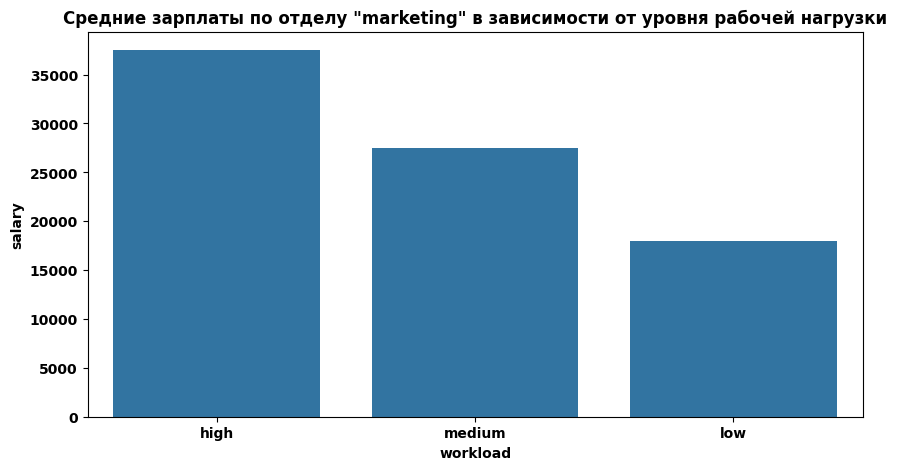

Стандартные отклонения зарплат в зависимости от уровня рабочей нагрузки по уровню "junior" в отделе "marketing"
workload
high      2564.80
low       2786.80
medium    3016.39
Name: salary, dtype: float64


In [43]:
# визуализация средних зарплат по уровню 'junior' по отделу 'marketing' в зависимости от рабочей нагрузки
sns.barplot(data = test_features[(test_features['level'] == "junior") & (test_features['dept'] == 'marketing')], x = 'workload', y = 'salary',
             order = ['high', 'medium', 'low'], estimator='mean', errorbar = None)
plt.title('Средние зарплаты по отделу "marketing" в зависимости от уровня рабочей нагрузки', fontsize = 12)
plt.show()

print('Стандартные отклонения зарплат в зависимости от уровня рабочей нагрузки по уровню "junior" в отделе "marketing"')
print(round(test_features[(test_features['level'] == "junior") & (test_features['dept'] == 'marketing')].groupby('workload')['salary'].std(),2))

**Вывод по промежуточному этапу**

Анализ пропущенных значений по набору `test_features` показал, что:
1. Пропущенные значения по признаку **level** можно заменить на 'junior'. Уровень зарплат - **salary** - и стаж работы - **employment years** - формируют картину, что представленные сотрудники имеют уровень 'junior'. Анализ стандартных отклонений зарплат в разрезе уровней так же подтверждает эту догадку;
2. Заполнение пустых значений по признаку **dept** представляется более сложной задачей, так как здесь стоит о вопрос о точечном заполнении (часть строк - один отдел, строка - другой отдел и т.д.). Подобное ручное заполнение не подходит под вводную о том, что обработку пустых значений необходимо выполнить в пайплайне, поэтому предлагается далее заменить пустоты на значение 'unknown';
3. Уровень рабочей нагрузки - **workload** - в пустых случаях можно заменить на **medium**, так как проведенный анализ средних зарплат и их отклонений, сопоставленный с фактической зарплатой сотрудника, подтверждает эту догадку.

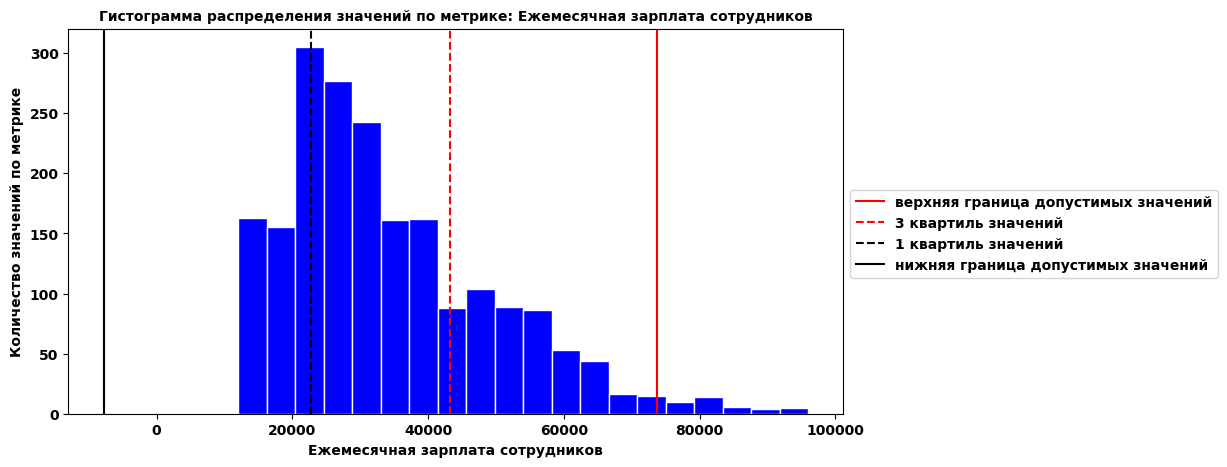

Верхняя допустимая граница значений: 73800.0
Нижняя допустимая граница значений: -7800.0
Медианное значение: 30000.0
Среднее значение: 34066.8
Доля значений, выходящих за верхнюю границу: 1.95%
Доля значений, выходящих за нижнюю границу: 0.00%


In [44]:
# построение  гистограммы распределения значений по признаку 'salary'
histogram_plotting(test_features, 'salary', 20, 10, 5, 'Ежемесячная зарплата сотрудников')

In [45]:
# вывод на экран информации о сотрудниках с большими размерами зарплат
print('Уровень должностей сотрудников с высокими зарплатами:', list(test_features[test_features['salary'] > 75_000]['level'].unique()))
print('Уроовень рабочей загрузки сотрудников:', list(test_features[test_features['salary'] > 75_000]['workload'].unique()))

Уровень должностей сотрудников с высокими зарплатами: ['senior']
Уроовень рабочей загрузки сотрудников: ['high']


**Вывод по промежуточному этапу**

Анализ количественных показателей по набору `test_features` показал, что:
1. Обнаруженные высокие значения по признаку **salary не являются аномалиями** - нет нужды в их исключении из набора данных.

**Вывод**

1. Выведена на экран основная статистическая информация по текущим версиям наборов данных:
    * Набор `train_data` характеризуется следующими статистическими показателями:
        * **employment_years - длительность работы в компании (в годах)**:
            * Среднее значение - 3.7;
            * Минимальное значение - 1.0;
            * Максимальное значение - 10.0;
            * Стандартное отклонение - 2.5.
        * **supervisor_evaluation - оценка качества работы сотрудника, которую дал руководитель**:
            * Среднее значение - 3.5;
            * Минимальное значение - 1.0;
            * Максимальное значение - 5.0;
            * Стандартное отклонение - 1.0.
        * **salary - ежемесячная зарплата сотрудника**:
            * Среднее значение - 33 926.7;
            * Минимальное значение - 12 000.0;
            * Максимальное значение - 98 400.0;
            * Стандартное отклонение - 14 900.7. **Данные достаточно вариативны** - необходимо изучить, каким отделам принадлежат те или иные уровни зарплат.
        * **job_satisfaction_rate - уровень удовлетворенности сотрудника работой в компании**:
            * Среднее значение - 0.53;
            * Минимальное значение - 0.03;
            * Максимальное значение - 1.0;
            * Стандартное отклонение - 0.23.
    * Набор `test_features` характеризуется следующими статистическими показателями:
        * **employment_years - длительность работы в компании (в годах)**:
            * Среднее значение - 3.67;
            * Минимальное значение - 1.0;
            * Максимальное значение - 10.0;
            * Стандартное отклонение - 2.5.
        * **supervisor_evaluation - оценка качества работы сотрудника, которую дал руководитель**:
            * Среднее значение - 3.5;
            * Минимальное значение - 1.0;
            * Максимальное значение - 5.0;
            * Стандартное отклонение - 1.0.
        * **salary - ежемесячная зарплата сотрудника**:
            * Среднее значение - 34 066.8;
            * Минимальное значение - 12 000.0;
            * Максимальное значение - 96 000.0;
            * Стандартное отклонение - 15 398.4. **Данные достаточно вариативны** - необходимо изучить, каким отделам принадлежат те или иные уровни зарплат.
    * Набор `test_target` характеризуется следующими статистическими показателями:
        * **job_satisfaction_rate - уровень удовлетворенности сотрудника работой в компании**:
            * Среднее значение - 0.55;
            * Минимальное значение - 0.03;
            * Максимальное значение - 1.0;
            * Стандартное отклонение - 0.22.
2. Исследование соотношения количества значений качественных показателей
    * Набор `train_data` характеризуется следующими показателями:
        * Большая часть сотрудников (60%) работает в отделах **sales** и **technology**: 38% и 22%, соответственно;
        * Наиболее часто встречающиеся должности: **junior** и **middle** - 47% и 44%, соответственно;
        * Большая часть сотрудников имеет **среднюю загруженность** - 52%;
        * 97% сотрудников **не получили** повышение за прошлый год;
        * 86% сотрудников **не нарушали** правила компании за прошлый год.
    * Набор `test_features` характеризуется следующими показателями:
        * Большая часть сотрудников (60%) работает в отделах **sales** и **technology**: 38% и 22%, соответственно;
        * Наиболее часто встречающиеся должности: **junior** и **middle** - 49% и 43%, соответственно;
        * Большая часть сотрудников имеет **среднюю загруженность** - 52%;
        * 97% сотрудников **не получили** повышение за прошлый год;
        * 87% сотрудников **не нарушали** правила компании за прошлый год.

Качественные признаки набора `test_features` **количественно повторяют то же соотношение**, что и в наборе `train_data`.

3. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**:
    * Набор `train_data` характеризуется следующими показателями:
        * Обнаруженные высокие значения по признаку **salary не являются аномалиями** - нет нужды в их исключении из набора данных;
        * Значения по признаку **job_satisfaction_rate** находятся в допустимом диапазоне значений - от 0 до 1.
    * Набор `market_time` характеризуется следующими показателями:
        * Обнаруженные высокие значения по признаку **salary не являются аномалиями** - нет нужды в их исключении из набора данных.
4. Проведен анализ пропущенных значений в наборах данных:
    * Набор `train_data` характеризуется следующими показателями:
        * Пропущенные значения по признаку **level** можно заменить на 'junior'. Уровень зарплат - **salary** - и стаж работы - **employment years** - формируют картину, что представленные сотрудники имеют уровень 'junior'. Анализ стандартных отклонений зарплат в разрезе уровней так же подтверждает эту догадку;
        * Заполнение пустых значений по признаку **dept** представляется более сложной задачей, так как здесь стоит о вопрос о точечном заполнении (часть строк - один отдел, строка - другой отдел и т.д.). Подобное ручное заполнение не подходит под вводную о том, что обработку пустых значений необходимо выполнить в пайплайне, поэтому предлагается далее заменить пустоты на значение 'unknown'.
    * Набор `test_features` характеризуется следующими показателями:
        * Пропущенные значения по признаку **level** можно заменить на 'junior'. Уровень зарплат - **salary** - и стаж работы - **employment years** - формируют картину, что представленные сотрудники имеют уровень 'junior'. Анализ стандартных отклонений зарплат в разрезе уровней так же подтверждает эту догадку;
        * Заполнение пустых значений по признаку **dept** представляется более сложной задачей, так как здесь стоит о вопрос о точечном заполнении (часть строк - один отдел, строка - другой отдел и т.д.). Подобное ручное заполнение не подходит под вводную о том, что обработку пустых значений необходимо выполнить в пайплайне, поэтому предлагается далее заменить пустоты на значение 'unknown';
        * Уровень рабочей нагрузки - **workload** - в пустых случаях можно заменить на **medium**, так как проведенный анализ средних зарплат и их отклонений, сопоставленный с фактической зарплатой сотрудника, подтверждает эту догадку.

### Корреляционный анализ данных <a class = 'anchor' id = 'Задача1_Корреляция'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Построение матрицы корреляции - поиск признаков высокой взаимосвязи показателей объектов;
2. Проведение отбора признаков для последующего построения моделей машинного обучения;
3. Формирование вывода по итогам данного этапа.

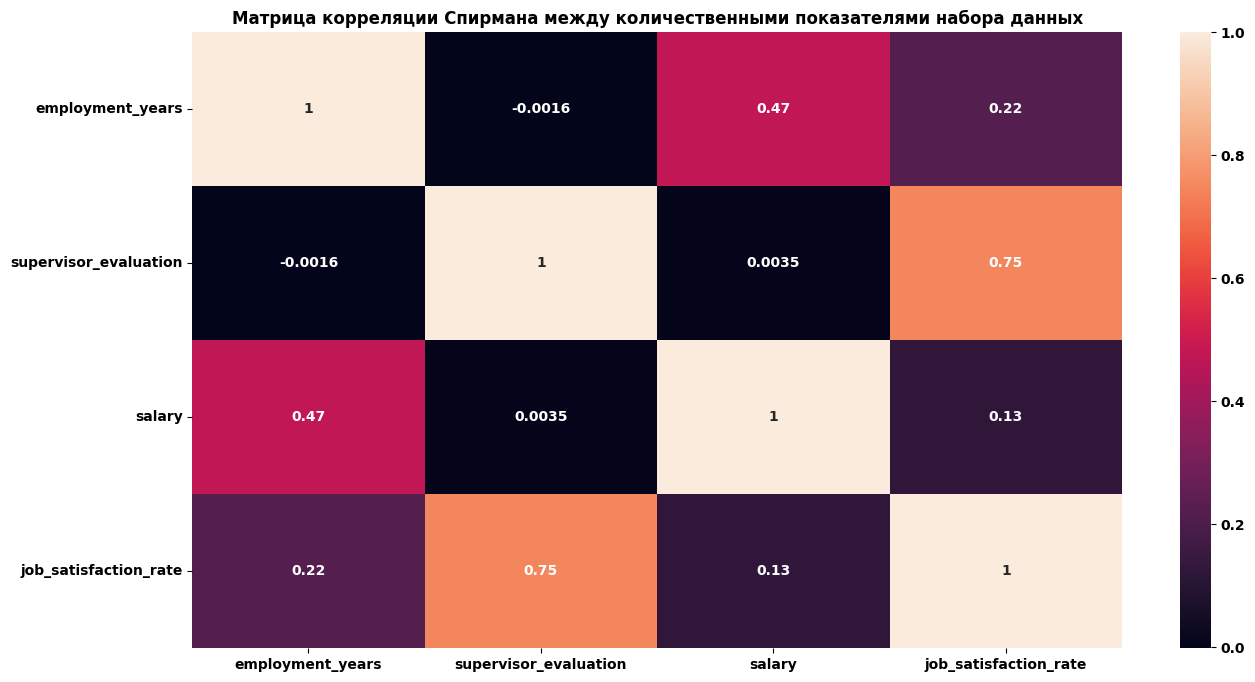

In [46]:
# построение матрицы корреляции и поиск сильных взаимосвязей
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.iloc[:, 1:].select_dtypes(include = 'number').corr(method = 'spearman'), annot = True) # используется построение корреляции по Спирману, так как количественные значения не распределены нормально
plt.title('Матрица корреляции Спирмана между количественными показателями набора данных', fontsize = 12)
plt.show()

**Вывод по промежуточному этапу:**

Заметна высокая линейная взаимосвязь между показателями **supervisor_evaluation** и **job_satisfaction_rate** - данные из области признаков и целевая переменная. Это можно логически объяснить: если человек недоволен своей работой, то и оценка качества его работы со стороны начальства будет низкой.

**Остальные данные не имеют сильной линейной взаимосвязи, поэтому исключать признаки из набора или добавлять новые нет необходимости**

**Вывод**

1. Построена матрица корреляции Спирмана между признаками набора данных и целевой переменной;
2. Обнаружена высокая взаимосвязь между признаками **supervisor_evaluation**, **job_satisfaction_rate** - показатели оценки сотрудника со стороны работодателя и удовлетворенности сотрудника свои рабочим местом;
3. Набор подготовлен к дальнейшему использованию в алгоритмах моделей машинного обучения.

### Построение моделей прогнозирования удовлетворенности сотрудника рабочим местом <a class = 'anchor' id = 'Задача1_Моделирование'></a>

#### Подготовка данных и построение пайплайна МО <a class = 'anchor' id = 'Задача1_Моделирование_Пайплайн'></a> 

Данный блок характеризуется следующими последовательными действиями:

1. Разделение обучающего набора `train_data` на область признаков и вектор целевой переменной - инициализация переменных **X_train** и **y_train** соответственно;
2. Инициализация переменных **X_test**, **y_test** для хранения области признаков и целевой переменной тестовых данных;
3. Отбор категориальных и количественных значений в отдельные переменные - инициализация переменных **ohe_cols**, **ord_cols** и **num_cols** соответственно в зависимости от последующего способа кодирования;
4. Формирование пайплайна обработки данных и обучения моделей регрессии;
5. Инициализация переменной **param_distributions** для хранения моделей и их гиперпараметров для последующего выбора лучшей;
6. Инициализация пользовательской функции по вычислению ошибки **SMAPE**;
7. Формирование вывода по итогам данного этапа.

In [47]:
# формирование области признаков и вектора целевой переменной из обучающего набора
X_train = train_data.drop(['job_satisfaction_rate', 'id'], axis = 1)
y_train = train_data['job_satisfaction_rate']

# формирование области признаков и вектора целевой переменной из тестового набора - перезапись исходных переменных
test_data = test_features.merge(test_target, on = 'id', how = 'inner')
X_test = test_data.drop(['job_satisfaction_rate', 'id'], axis = 1)
y_test = test_data['job_satisfaction_rate']

In [48]:
# отбор категориальных и количественных признаков
ohe_cols = ['dept', 'last_year_promo', 'last_year_violations']
ord_cols = ['level', 'workload']
num_cols = list(X_train.select_dtypes(include = 'number').columns)

In [49]:
# формирование пайплайна кодирования данных
ohe_pipeline = Pipeline(
    [
        ('simpleImputer_ohe',
         SimpleImputer(missing_values = np.nan,
                       strategy = 'most_frequent',
                       fill_value = 'unknown')),
        ('ohe',
         OneHotEncoder(drop = 'first',
                       sparse_output = False,
                       handle_unknown = 'ignore'))               
    ]
)

ord_pipeline = Pipeline(
    [
        (
            'simple_imputer_ord_before',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[
                                      ['junior','middle', 'seinor'],
                                      ['low', 'medium', 'high']],
                          handle_unknown='use_encoded_value',
                          unknown_value=np.nan)
        ),
        (
            'simple_imputer_ord_after',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [50]:
# формирования пайплайна подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipeline, ohe_cols),
        ('ord', ord_pipeline, ord_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder = 'passthrough'
)

In [51]:
# формирование пайплайна подготовки данных и обучения модели - используется модель DecisionTreeRegressor
final_pipeline = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state = RANDOM_STATE))
    ]
)

In [52]:
# инициализация переменной 'param_grid' для поиска оптимальной модели
param_grid = {
    'preprocessor__num' : [StandardScaler(), MinMaxScaler(), 'passthrough'],
    'models' : [DecisionTreeRegressor(random_state = RANDOM_STATE),
                LinearRegression()]
}

In [53]:
# инициализация переменной 'param_distributions' для хранения распределения значений гиперпараметров
param_distributions = [
    {
        'models' : [DecisionTreeRegressor(random_state = RANDOM_STATE)],
        'models__max_depth' : range(2, 11),
        'models__min_samples_split' : range(2, 6),
        'models__min_samples_leaf' : range(2, 6),
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models' : [LinearRegression()],
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [54]:
# инициализация пользовательской функции по вычислению ошибки SMAPE
def my_smape_score(y_true, y_pred):
    n = len(y_true)
    numerator = 2 * np.abs(y_true - y_pred)
    denominator = (y_true + y_pred)

    return  1 / n * np.sum(numerator / denominator)


smape_score = make_scorer(my_smape_score, greater_is_better = False)

**Вывод:**

1. Проведено разделение исходного обучающего набора на область признаков и вектор целевой переменной - инициализированы переменные **X_train** и **y_train** соответственно;
2. Инициализированы переменные **X_test** и **y_test** для хранения области признаков и целевой переменной тестовых данных;
3. Проведен отбор категориальных и количественных значений в отдельные переменные - инициализированы переменные **ohe_cols**, **ord_cols** и **num_cols** соответственно в зависимости от последующего способа кодирования;
4. Проведено формирование пайплайна обработки данных и обучения моделей регрессии. Инициализирована переменная **final_pipeline**;
5. Инициализирована переменная **param_distributions** для хранения моделей и их гиперпараметров для последующего выбора лучшей;
6. Инициализирована пользовательская функция по вычислению ошибки **SMAPE**.

#### Выбор оптимальной модели <a class = 'anchor' id = 'Задача1_Моделирование_Выбор'></a> 

Данный блок характеризуется следующими последовательными действиями:

1. Выбор оптимальной модели из набора с перебором параметров и поиском по сетке - **GridSearchCV**. Вывод на экран наименования лучшей модели и значения метрики качества;
2. Оценка качества модели на тестовом наборе данных;
3. Построение графиков анализа остатков модели;
4. Формирование вывода по итогам данного этапа.

In [55]:
grid_withParams = GridSearchCV(
    final_pipeline,
    param_grid = param_distributions,
    cv = 5,
    scoring = smape_score,
    n_jobs = -1
)

# обучение модели на тренировочном наборе
grid_withParams.fit(X_train, y_train)

# вывод лучшей модели на экран
print('Лучшая модель классификации и ее параметры')
print(grid_withParams.best_params_)
print()
print('Метрика SMAPE для лучшей модели')
print(round(grid_withParams.best_score_, 2))

Лучшая модель классификации и ее параметры
{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 10, 'models__min_samples_leaf': 3, 'models__min_samples_split': 2, 'preprocessor__num': MinMaxScaler()}

Метрика SMAPE для лучшей модели
-0.16


In [56]:
# проверка качества модели на тестовой выборке
y_pred = grid_withParams.predict(X_test)
print('Метрика SMAPE для лучшей модели на ТЕСТОВОЙ выборке:', round(my_smape_score(y_test, y_pred), 2))

Метрика SMAPE для лучшей модели на ТЕСТОВОЙ выборке: 0.15


In [57]:
# инициализация пользовательской функции по анализу остатков
def residuals_analysis(y_test, predictions):
    # инициализация переменной 'residuals' - расчет остатков
    residuals = y_test - predictions

    # построение визуализации для анализа остатков
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

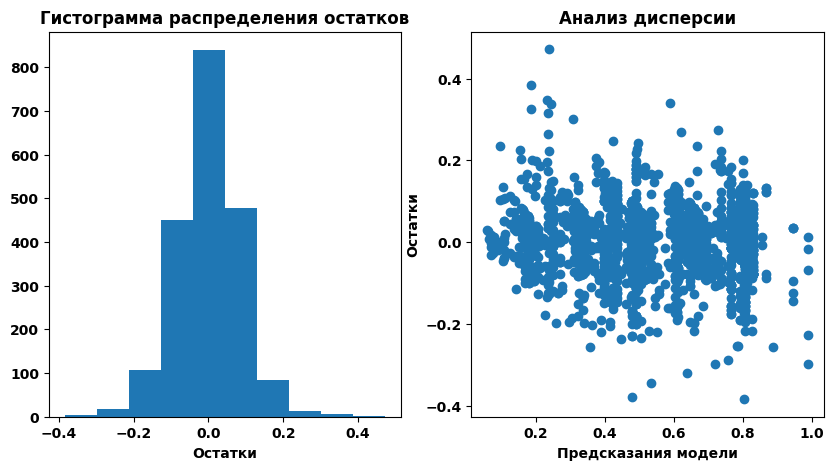

In [58]:
# анализ остатков работы модели прогноза удовлетворенности сотрудника рабочим местом
residuals_analysis(y_test, y_pred)

**Вывод:**

1. Произведен выбор оптимальной модели регрессионного анализа:
    * `Модель DecisionTreeRegressor` с параметрами:
        * **random_state** - 42;
        * **min_samples_leaf** - 3;
        * **min_samples_split** - 2;
        * **max_depth** - 10.
2. Произведена оценка качества модели на тестовых данных. **SMAPE составила 0.15** - качество модели удовлетворительное;
3. Проведен анализ остатков регрессионной модели. **Распределение значений остатков соответствует нормальному**. Дисперсия остатков - **практически неизменна на всем размахе значений**
4. **СФормированная модель может быть использована для дальнейшего рещения задач**.

Дерево решений сработало лучше линейной регрессии по причине лучшей работы с нелинейно связанными данными - при построении матрицы корреляции наблюдалась только одна сильная линейная взаимосвязь между количественными показателями. Линейная регрессия, логика прогнозирования которой изначально основана на сильной линейной связи признаков с целевой переменной, в данном случае сработала значительно слабее.

## Задача 2_Предсказание увольнения сотрудника из компании <a class = 'anchor' id = 'Задача2'></a>

### Загрузка данных <a class = 'anchor' id = 'Задача2_Загрузка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов:
    * **train_quit**;
    * **test_target_quit**.
2. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
    * визуализация распределений количественных показателей.
3. Формирование вывода по итогам данного этапа.

In [59]:
# загрузка данных в рабочую среду

try:
    train_quit = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/train_quit.csv') # тренировочная выборка
    test_target_quit = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/test_target_quit.csv') # целевой признак тестовой выборки
except:
    train_quit = pd.read_csv('/datasets/train_quit.csv')
    test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

Структура набора данных train_quit


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
None



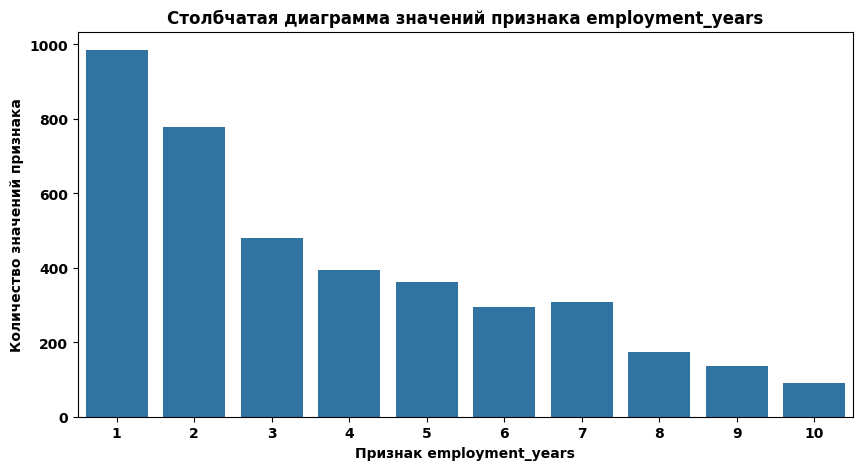

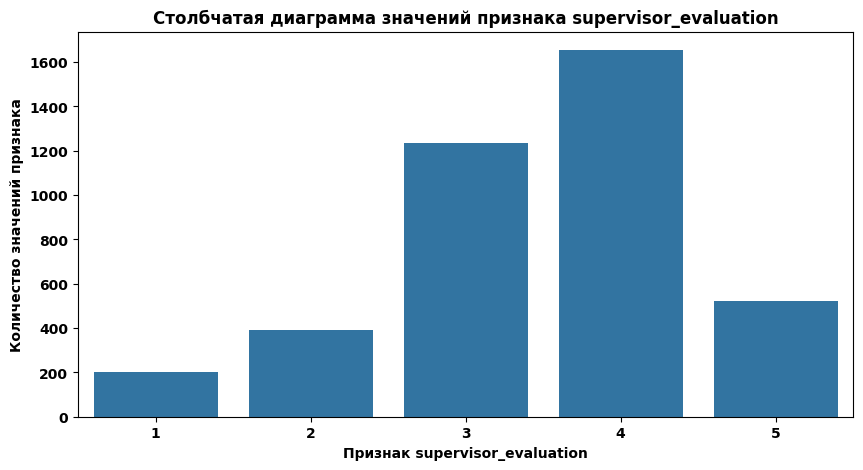

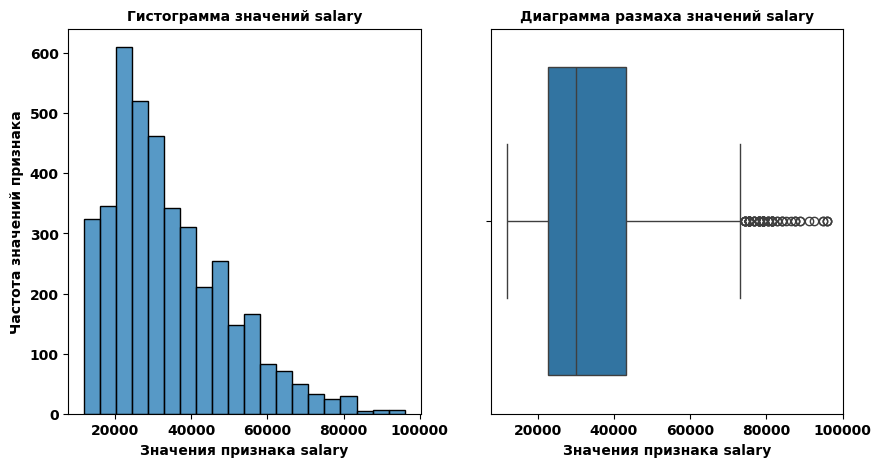

In [60]:
# вывод на экран параметров датасета 'train_quit'
first_meeting(train_quit, 'train_quit')

# вывод на экран графиков дискретных количественных величин по набору 'train_quit'
for col in ['employment_years', 'supervisor_evaluation']:
    num_countplot(train_quit, col)

# вывод на экран графиков непрерывных количественных величин по набору 'train_quit'
num_distribution(train_quit, 'salary', 20)

**Вывод**

1. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные в соответствие с названиями загружаемых датасетов:
    * `train_quit`;
    * `test_target_quit`.
2. Выведены на экран параметры датасетов:
    * `test_quit`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Названия столбцов **соответствуют формату snake_case**;
        * Наблюдаются выбросы по признаку **salary** - необходимо изучить данные случаи на этапе исследовательского анализа.

### Предобработка данных <a class = 'anchor' id = 'Задача2_Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Проверка датасетов на дубликаты:
    * Явные дубликаты;
    * Неявные дубликаты.
2. Формирование вывода по итогам данного этапа.

In [61]:
# проверка набора 'train_quit' на уникальные значения
print('Уникальные значения по категориальным столбцам train_quit')
unique_values(train_quit)

Уникальные значения по категориальным столбцам train_quit
Столбец dept: ['sales', 'purchasing', 'marketing', 'technology', 'hr']
Столбец level: ['middle', 'junior', 'sinior']
Столбец workload: ['high', 'medium', 'low']
Столбец last_year_promo: ['no', 'yes']
Столбец last_year_violations: ['no', 'yes']
Столбец quit: ['no', 'yes']


In [62]:
# проверка набора 'test_target_quit' на уникальные значения
print('Уникальные значения по категориальным столбцам test_target_quit')
unique_values(test_target_quit)

Уникальные значения по категориальным столбцам test_target_quit
Столбец quit: ['yes', 'no']


In [63]:
# замена значений в датасетах
replace_values(train_quit, 'level', 'sinior', 'senior')

In [64]:
# перезапись переменных 'data_names_list' и 'data_list' для хранения списка названий наборов данных и самих наборов данных
data_names_list = ['train_quit', 'test_target_quit']
data_list = [train_quit, test_target_quit]

In [65]:
# проверка на наличие явных дубликатов
counter = 0

print('Проверка на наличие явных дубликатов')
for df in data_list:
    print(f'Число явных дубликатов в {data_names_list[counter]}: {df.duplicated().sum()}')
    counter += 1

Проверка на наличие явных дубликатов
Число явных дубликатов в train_quit: 0
Число явных дубликатов в test_target_quit: 0


**Вывод по промежуточному этапу**

Явных дубликатов по строкам наборов данных не обнарежно (при полном сравнении строк). Однако необходимо проверить наличие явных дубликатов по набору столбцов.

**По определению, не может быть двух одинаковых id сотрудников в компании**. Можно проверить наличие дубликатов по следующим условиям:
* id сотрудника;
* id сотрудника и департамент;
* id сотрудника, департамент и уровень квалификации.

Эти данные точно позволят идентифицировать сотрудника компании и проверить, есть ли среди объектов дублирующиеся

In [66]:
# повторная проверка на дубликаты
duplicates_checking(train_quit)

print(f'Количество дубликатов по столбцу id в датасете test_target_quit:', test_target_quit.duplicated(subset=['id']).sum())

Проверка на дубликаты пройдена. Дублирующиеся значения отсутствуют
Количество дубликатов по столбцу id в датасете test_target_quit: 0


**Вывод**

1. Выполнена проверка наборов данных на дубликаты:
    * **Явные дубликаты** - явные дубликаты **не обнаружены**; 
    * **Неявные дубликаты**:
        * Столбец **level** в наборе `train_quit` - преобразованы значения "sinior" на "senior".
2. Данные прошли этап предобработки и готовы к исследовательскому анализу.

### Исследовательский анализ данных <a class = 'anchor' id = 'Задача2_Исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Вывод на экран основной статистической информации по текущим версиям наборов данных;
2. Исследование соотношения количества значений качественных показателей по набору `test_target_quit`;
3. Исследование соотношения количества значений качественных и количественных показателей по набору `train_quit`;
4. Формирование портретов сотрудников, потенциально склонных к уходу:
    * построение столбчатых диаграмм;
    * построение гистограмм распределения значений.
5. Исследование взаимосвязи уровня удовлетворенности сотрудников и факта увольнения с работы;
6. Формирование вывода по итогам данного этапа.

In [67]:
# вывод на экран основных статистик по наборам данных
counter = 0

for df in data_list:
    print(f'Основная статистическая информация по набору {data_names_list[counter]}')
    display(df.iloc[:, 1:].describe())
    counter += 1
    print()

Основная статистическая информация по набору train_quit


,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000



Основная статистическая информация по набору test_target_quit


,quit
count,2000
unique,2
top,no
freq,1436


Набор `test_quit` характеризуется следующими статистическими показателями:

* **employment_years - длительность работы в компании (в годах)**:
    * Среднее значение - 3.7;
    * Минимальное значение - 1.0;
    * Максимальное значение - 10.0;
    * Стандартное отклонение - 2.5.
* **supervisor_evaluation - оценка качества работы сотрудника, которую дал руководитель**:
    * Среднее значение - 3.5;
    * Минимальное значение - 1.0;
    * Максимальное значение - 5.0;
    * Стандартное отклонение - 1.0.
* **salary - ежемесячная зарплата сотрудника**:
    * Среднее значение - 33 805.8;
    * Минимальное значение - 12 000.0;
    * Максимальное значение - 96 000.0;
    * Стандартное отклонение - 15 152.4. **Данные достаточно вариативны** - необходимо изучить, каким отделам принадлежат те или иные уровни зарплат.

#### Анализ набора обучающих данных <a class = 'anchor' id = 'Задача2_Исследование_ОбучающиеДанные'></a>

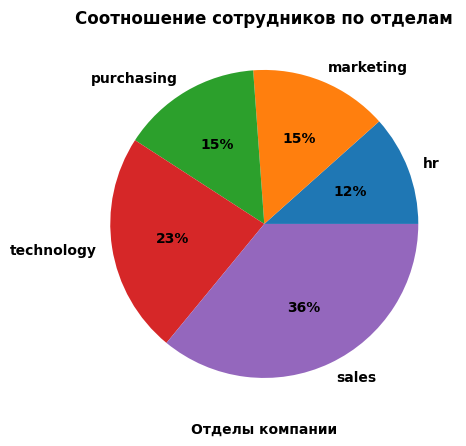

,count_of_employers,share_of_employers
dept,,
sales,1438,35.95
technology,928,23.20
purchasing,588,14.70
marketing,582,14.55
hr,464,11.60


In [68]:
# построение пай-чарта по соотношению сотрудников в контексте отделов
display_info(train_quit, 'dept', 'Соотношение сотрудников по отделам', 'Отделы компании', 'pie')

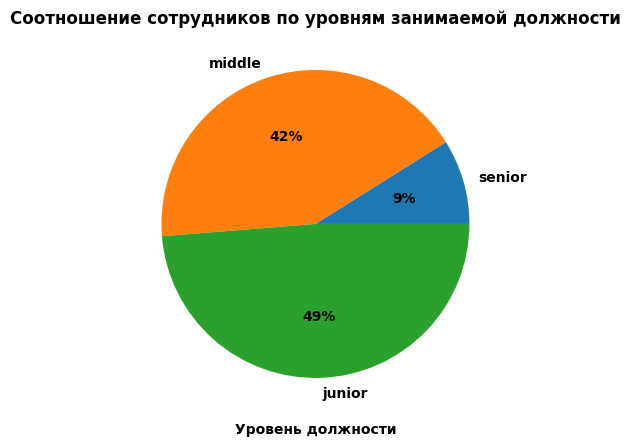

,count_of_employers,share_of_employers
level,,
junior,1949,48.72
middle,1694,42.35
senior,357,8.92


In [69]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(train_quit, 'level', 'Соотношение сотрудников по уровням занимаемой должности', 'Уровень должности', 'pie')

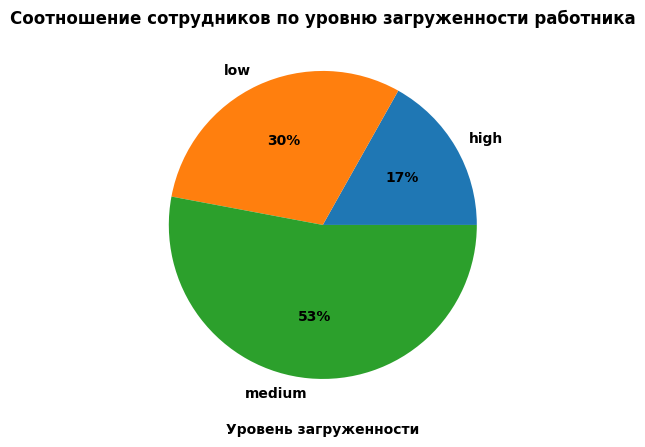

,count_of_employers,share_of_employers
workload,,
medium,2118,52.95
low,1208,30.20
high,674,16.85


In [70]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(train_quit, 'workload', 'Соотношение сотрудников по уровню загруженности работника', 'Уровень загруженности', 'pie')

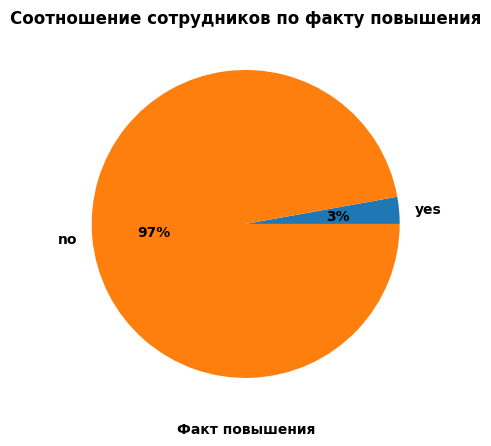

,count_of_employers,share_of_employers
last_year_promo,,
no,3887,97.18
yes,113,2.82


In [71]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(train_quit, 'last_year_promo', 'Соотношение сотрудников по факту повышения', 'Факт повышения', 'pie')

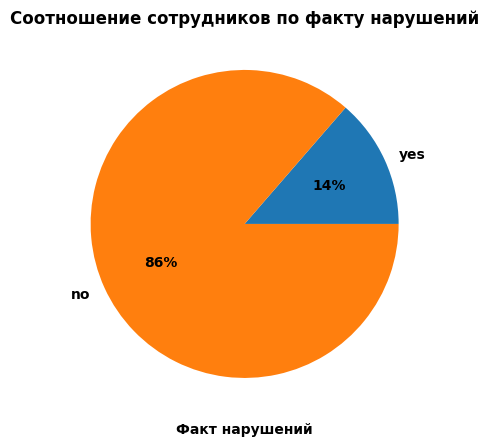

,count_of_employers,share_of_employers
last_year_violations,,
no,3455,86.38
yes,545,13.63


In [72]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(train_quit, 'last_year_violations', 'Соотношение сотрудников по факту нарушений', 'Факт нарушений', 'pie')

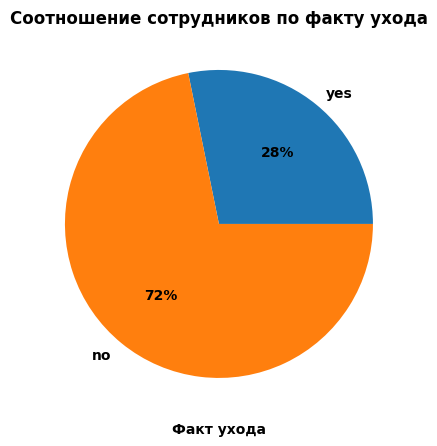

,count_of_employers,share_of_employers
quit,,
no,2872,71.8
yes,1128,28.2


In [73]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(train_quit, 'quit', 'Соотношение сотрудников по факту ухода', 'Факт ухода', 'pie')

**Вывод по промежуточному этапу**

`train_quit`

* Большая часть сотрудников (59%) работает в отделах **sales** и **technology**: 36% и 23%, соответственно;
* Наиболее часто встречающиеся должности: **junior** и **middle** - 49% и 42%, соответственно;
* Большая часть сотрудников имеет **среднюю загруженность** - 53%;
* 97% сотрудников **не получили** повышение за прошлый год;
* 86% сотрудников **не нарушали** правила компании за прошлый год;
* У 72% сотрудников **не зафиксирован уход из компании**.

Такая несбалансированность значений целевой переменной сразу наталкивает на последующий выбор метрики оценки качества модели - **roc_auc_score**, **precision**, **recall**, **fbeta_score** - которая устойчива к дисбалансу классов.

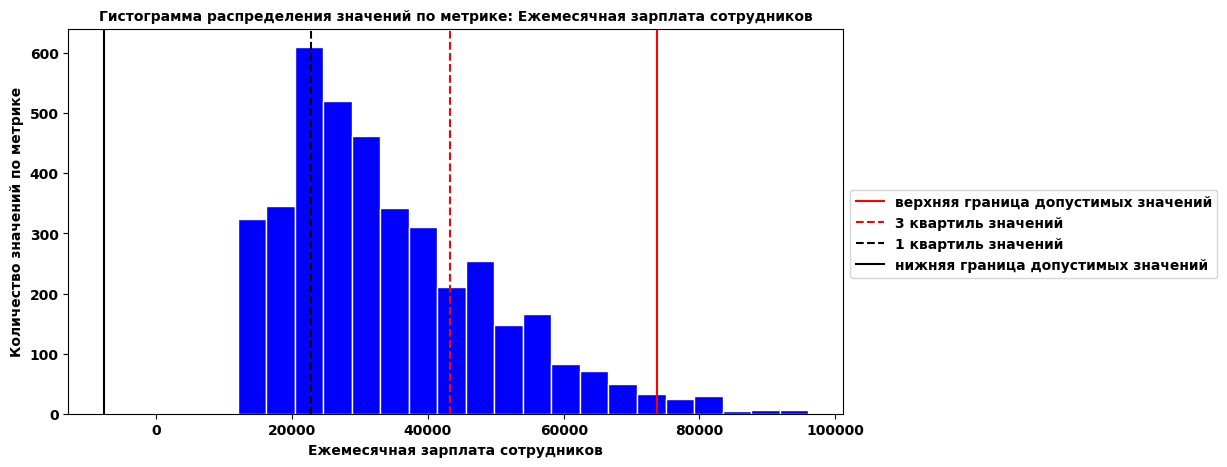

Верхняя допустимая граница значений: 73800.0
Нижняя допустимая граница значений: -7800.0
Медианное значение: 30000.0
Среднее значение: 33805.8
Доля значений, выходящих за верхнюю границу: 1.95%
Доля значений, выходящих за нижнюю границу: 0.00%


In [74]:
# построение  гистограммы распределения значений по признаку 'salary'
histogram_plotting(train_quit, 'salary', 20, 10, 5, 'Ежемесячная зарплата сотрудников')

In [75]:
# вывод на экран информации о сотрудниках с большими размерами зарплат
print('Уровень должностей сотрудников с высокими зарплатами:', list(train_quit[train_quit['salary'] > 75_000]['level'].unique()))
print('Уроовень рабочей загрузки сотрудников:', list(train_quit[train_quit['salary'] > 75_000]['workload'].unique()))

Уровень должностей сотрудников с высокими зарплатами: ['senior']
Уроовень рабочей загрузки сотрудников: ['high']


**Вывод по промежуточному этапу**

Анализ количественных показателей по набору `train_quit` показал, что:
1. Обнаруженные высокие значения по признаку **salary не являются аномалиями** - нет нужды в их исключении из набора данных.

#### Анализ набора тестовых данных - целевая переменная <a class = 'anchor' id = 'Задача2_Исследование_ТестовыеДанные'></a>

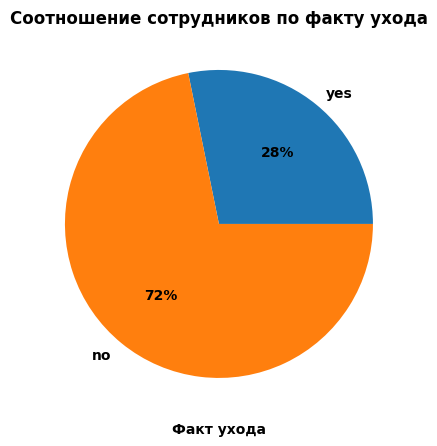

,count_of_employers,share_of_employers
quit,,
no,1436,71.8
yes,564,28.2


In [76]:
# построение пай-чарта по соотношению сотрудников в контексте занимаемой должности
display_info(test_target_quit, 'quit', 'Соотношение сотрудников по факту ухода', 'Факт ухода', 'pie')

**Вывод по промежуточному этапу**

`test_target_quit`

* У 72% сотрудников **не зафиксирован уход из компании**.

**Соблюдено такое же соотношение классов целевой переменной, что и в наборе обучающих данных**.

#### Формирование портретов сотрудников, потенциально склонных к уходу <a class = 'anchor' id = 'Задача2_Исследование_Портрет'></a>

In [77]:
# отбор ушедших сотрудников - инициализация переменной 'quit_employee'
quit_employee = train_quit[train_quit['quit'] == 'yes']

In [78]:
# инициализация пользовательской функции построения столбчатой диаграммы в нескольких разрезах
def count_plotting(df : pd.DataFrame, x_feature : str, filter : str, x_label : str, title : str):
    sns.countplot(data = df, x = x_feature, hue = filter)
    plt.title(title, fontsize = 12)
    plt.xlabel(x_label)
    plt.ylabel('Количество ушедших сотрудников')
    plt.show()

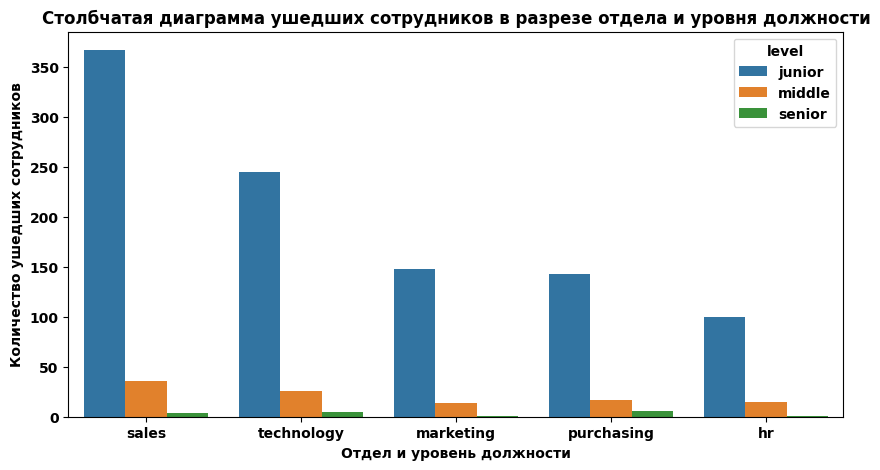

In [79]:
# построение диаграммы количества сотрудников в разрезе отделов и занимаемых должностей
count_plotting(quit_employee, 'dept', 'level', 'Отдел и уровень должности', 'Столбчатая диаграмма ушедших сотрудников в разрезе отдела и уровня должности')

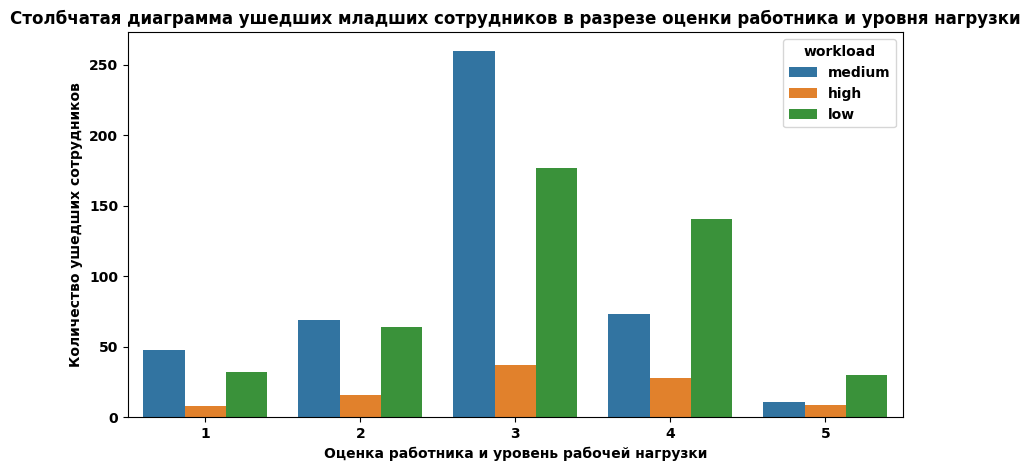

In [80]:
# построение диаграммы количества сотрудников в разрезе уровня 'junior', оценки со стороны работодатели и уровня рабочей нагрузки
count_plotting(quit_employee[quit_employee['level'] == 'junior'], 'supervisor_evaluation', 'workload', 'Оценка работника и уровень рабочей нагрузки', 'Столбчатая диаграмма ушедших младших сотрудников в разрезе оценки работника и уровня нагрузки')

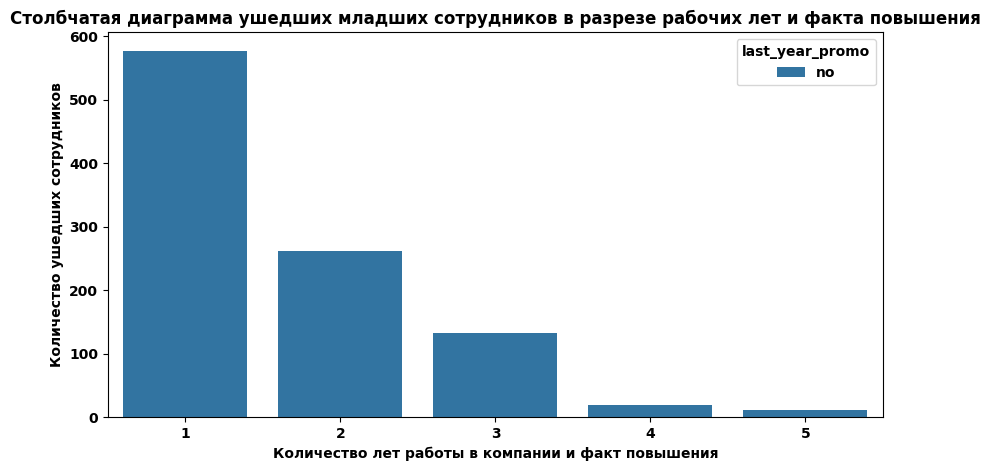

In [81]:
# построение диаграммы количества сотрудников в разрезе уровня 'junior', количества рабочих лет и факта повышения
count_plotting(quit_employee[quit_employee['level'] == 'junior'], 'employment_years', 'last_year_promo', 'Количество лет работы в компании и факт повышения', 'Столбчатая диаграмма ушедших младших сотрудников в разрезе рабочих лет и факта повышения')

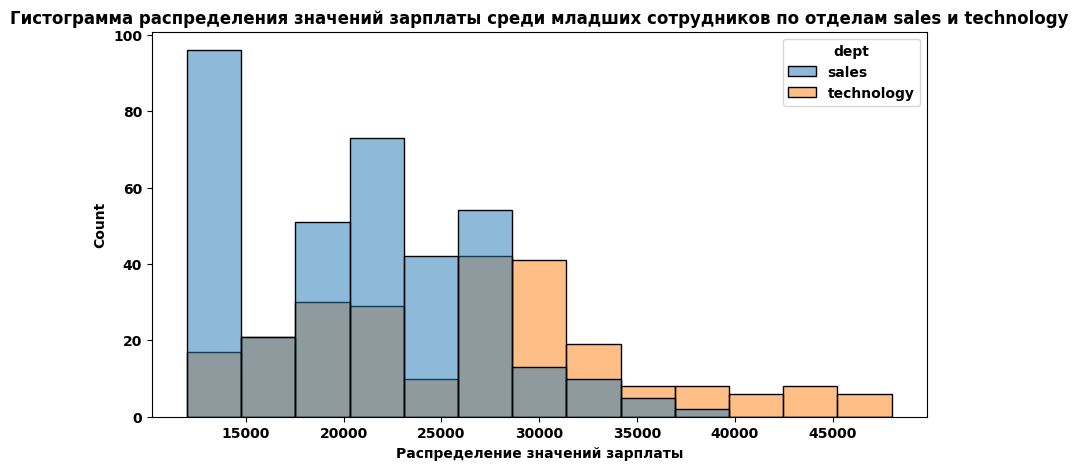

In [ ]:
# построение гистограммы распределения значений зарплаты младших сотрудников по отделам 'sales' и 'technology'
sns.histplot(data = quit_employee[(quit_employee['level'] == 'junior') & ((quit_employee['dept'] == 'sales') | (quit_employee['dept'] == 'technology'))],
             x = 'salary', hue = 'dept', legend = True)
plt.title('Гистограмма распределения значений зарплаты среди младших сотрудников по отделам sales и technology')
plt.xlabel('Распределение значений зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

**Вывод по промежуточному этапу**

Сформирован портрет сотрудника потенциально склонного к уходу:
1. Занимаемый уровень должности сотрудника - **junior**. Такие сотрудники находятся в стадии поиска лучшего места, где им было бы комфортно работать. И если их не устраивает текущая компания, то они без проблем готовы рассмотреть другие предложения на рынке;
2. Большая часть уволившихся сотрудников **junior** работает в отделах **sales** и **technology**;
3. Стоит отметить, что уровень рабочей загрузки у таких сотрудников - это **low** и **medium**. Причем средний уровень загрузки представлен в большей степени. Скорее всего молодые специалисты, вышедшие на рабочее место, не выдерживают того уровня обязанностей, который на них возложили;
4. Также можно отметить, что при такой нагрузке результат работ либо посредственный - **оценка 3** - или хороший - **оценка 4**;
5. Большая часть уволившихся молодых сотрудников отработали **1 - 3 года**. Т.е. возложенные обязанности, а так же отсутствие карьерных перспектив - **посредственные оценки от работодателя плюс отсутствие повышения** - побудили сотрудников искать новое место. Так же **отсутствие повышения** побудило работников со стажем более 3 лет искать новое место;
6. В дополнение ко всему этому можно добавить уровень зарплат
    * Работники **junior** из отдела **sales** при уровне возложенных обязанностей и низкой оплате труда (большая часть значений имеет ЗП менее 30 000 у.е.) меняют рабочее место;
    * Работники **junior** из отдела **technology** скорее всего приходят в компании за первым рабочим опытом. Набрав необходимую практическую базу, эти сотрудники готовы рассмотреть более финансово привлекательное место работы.

#### Анализ взаимосвязи уровня удовлетворенности сотрудника и факта ухода <a class = 'anchor' id = 'Задача2_Исследование_Взаимосвязь'></a>

In [87]:
# объединение наборов данных 'test_features' и 'test_target_quit' - инициализация переменной 'test_data_quit'
test_data_quit = (test_features
                  .merge(test_target_quit, on = 'id', how = 'inner')
                  .merge(test_target, on = 'id', how = 'inner'))

In [88]:
# проверка размерности наборов данных ДО и ПОСЛЕ объединения
print(f'Количество строк ДО объединения данных: {test_features.shape[0]}.\nКоличество строк ПОСЛЕ объединения данных {test_data_quit.shape[0]}.\nИзменение строк на {round((test_data_quit.shape[0] - test_features.shape[0]) / test_features.shape[0] * 100, 0)}%')

print()
# проверка размерности наборов данных ДО и ПОСЛЕ объединения
print(f'Количество столбцов ДО объединения данных: {test_features.shape[1]}.\nКоличество столбцов ПОСЛЕ объединения данных {test_data_quit.shape[1]}.\nИзменение столбцов на {round((test_data_quit.shape[1] - test_features.shape[1]) / test_features.shape[1] * 100, 0)}%')

Количество строк ДО объединения данных: 2000.
Количество строк ПОСЛЕ объединения данных 2000.
Изменение строк на 0.0%

Количество столбцов ДО объединения данных: 9.
Количество столбцов ПОСЛЕ объединения данных 11.
Изменение столбцов на 22.0%


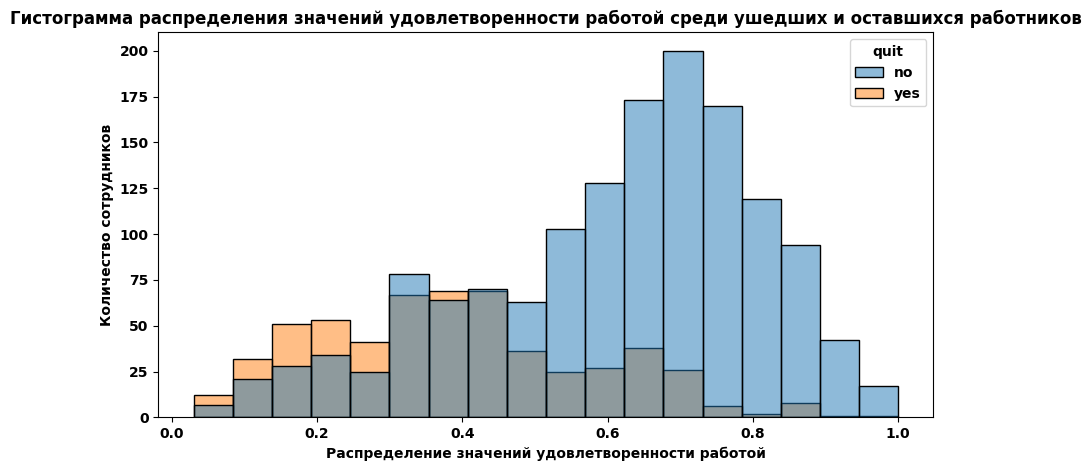

In [89]:
# построение гистограммы распределения значений удовлетворенности работой среди ушедших и оставшихся сотрудников
sns.histplot(test_data_quit,
             x = 'job_satisfaction_rate', hue = 'quit', legend = True)
plt.title('Гистограмма распределения значений удовлетворенности работой среди ушедших и оставшихся работников')
plt.xlabel('Распределение значений удовлетворенности работой')
plt.ylabel('Количество сотрудников')
plt.show()

**Вывод по промежуточному этапу**

Построенное распределение значений удовлетворенности работой способно подтвердить предположение о том, что **данный показатель и факт уход взаимосвязаны**.

Большая часть значений удовлетворенности сотрудников среди тех, кто не ушел, **группируется в диапазоне от 0.6 до 0.8**.

Большая часть оценок рабочего места среди тех сотрудников, кто покинул штат сотрудников компании, **находятся ниже границы в 0.5**.

**Вывод**

1. Выведена на экран основная статистическая информация по текущим версиям наборов данных:
    * Набор `test_quit` характеризуется следующими статистическими показателями:
        * **employment_years - длительность работы в компании (в годах)**:
            * Среднее значение - 3.7;
            * Минимальное значение - 1.0;
            * Максимальное значение - 10.0;
            * Стандартное отклонение - 2.5.
        * **supervisor_evaluation - оценка качества работы сотрудника, которую дал руководитель**:
            * Среднее значение - 3.5;
            * Минимальное значение - 1.0;
            * Максимальное значение - 5.0;
            * Стандартное отклонение - 1.0.
        * **salary - ежемесячная зарплата сотрудника**:
            * Среднее значение - 33 805.8;
            * Минимальное значение - 12 000.0;
            * Максимальное значение - 96 000.0;
            * Стандартное отклонение - 15 152.4. **Данные достаточно вариативны** - необходимо изучить, каким отделам принадлежат те или иные уровни зарплат.
2. Проведено исследование соотношения количества значений качественных показателей по набору `test_target_quit`:
    * У 72% сотрудников **не зафиксирован уход из компании**.

**Соблюдено такое же соотношение классов целевой переменной, что и в наборе обучающих данных**.

3. Исследование соотношения количества значений качественных и количественных показателей по набору `train_quit`:
    * Большая часть сотрудников (59%) работает в отделах **sales** и **technology**: 36% и 23%, соответственно;
    * Наиболее часто встречающиеся должности: **junior** и **middle** - 49% и 42%, соответственно;
    * Большая часть сотрудников имеет **среднюю загруженность** - 53%;
    * 97% сотрудников **не получили** повышение за прошлый год;
    * 86% сотрудников **не нарушали** правила компании за прошлый год;
    * У 72% сотрудников **не зафиксирован уход из компании**;
    * Обнаруженные высокие значения по признаку **salary не являются аномалиями** - нет нужды в их исключении из набора данных.

 Такая несбалансированность значений целевой переменной сразу наталкивает на последующий выбор метрики оценки качества модели - **roc_auc_score**, **precision**, **recall**, **fbeta_score** - которая устойчива к дисбалансу классов.

4. Сформирован портрет сотрудника потенциально склонного к уходу:
    * Занимаемый уровень должности сотрудника - **junior**. Такие сотрудники находятся в стадии поиска лучшего места, где им было бы комфортно работать. И если их не устраивает текущая компания, то они без проблем готовы рассмотреть другие предложения на рынке;
    * Большая часть уволившихся сотрудников **junior** работает в отделах **sales** и **technology**;
    * Стоит отметить, что уровень рабочей загрузки у таких сотрудников - это **low** и **medium**. Причем средний уровень загрузки представлен в большей степени. Скорее всего молодые специалисты, вышедшие на рабочее место, не выдерживают того уровня обязанностей, который на них возложили;
    * Также можно отметить, что при такой нагрузке результат работ либо посредственный - **оценка 3** - или хороший - **оценка 4**;
    * Большая часть уволившихся молодых сотрудников отработали **1 - 3 года**. Т.е. возложенные обязанности, а так же отсутствие карьерных перспектив - **посредственные оценки от работодателя плюс отсутствие повышения** - побудили сотрудников искать новое место. Так же **отсутствие повышения** побудило работников со стажем более 3 лет искать новое место;
    * В дополнение ко всему этому можно добавить уровень зарплат:
        * Работники **junior** из отдела **sales** при уровне возложенных обязанностей и низкой оплате труда (большая часть значений имеет ЗП менее 30 000 у.е.) меняют рабочее место;
        * Работники **junior** из отдела **technology** скорее всего приходят в компании за первым рабочим опытом. Набрав необходимую практическую базу, эти сотрудники готовы рассмотреть более финансово привлекательное место работы.
5. Построена гистограмма распределения значений удовлетворенности сотрудников рабочим местом:
    * Построенное распределение значений удовлетворенности работой способно подтвердить предположение о том, что **данный показатель и факт уход взаимосвязаны**.
    * Большая часть значений удовлетворенности сотрудников среди тех, кто не ушел, **группируется в диапазоне от 0.6 до 0.8**.
    * Большая часть оценок рабочего места среди тех сотрудников, кто покинул штат сотрудников компании, **находятся ниже границы в 0.5**.

### Добавление нового входного признака <a class = 'anchor' id = 'Задача2_ДобавлениеПризнака'></a>

Данный этап характеризуется следующими последовательными признаками:

1. Формирование датафрейма из спрогнозированных значений удовлетворенности работой - инициализация переменной **pred_rate_data**;
2. Добавление значений **pred_rate_data** в набор **train_quit** - инициализация переменной **train_quit_full**;
3. Формирование вывода по итогам данного этапа.

In [99]:
# формирование набора данных из спрогнозированных значений удовлетворенности работой
pred_rate_data = pd.DataFrame(
    data = np.round(y_pred, 2),
    index = test_data['id'], # формирование индексов сотрудников из первоначального набора тестовых данных
    columns = ['pred_job_satisfaction_rate'] 
)

pred_rate_data = pred_rate_data.reset_index(drop = False)

In [101]:
# добавление нового признака в набор обучающих данных
train_quit_full = train_quit.merge(pred_rate_data, on = 'id', how = 'inner')

In [ ]:
# проверка размерности наборов данных ДО и ПОСЛЕ объединения
print(f'Количество строк ДО объединения данных: {train_quit.shape[0]}.\nКоличество строк ПОСЛЕ объединения данных {train_quit_full.shape[0]}.\nИзменение строк на {round((train_quit_full.shape[0] - train_quit.shape[0]) / train_quit.shape[0] * 100, 0)}%')

print()
# проверка размерности наборов данных ДО и ПОСЛЕ объединения
print(f'Количество столбцов ДО объединения данных: {train_quit.shape[1]}.\nКоличество столбцов ПОСЛЕ объединения данных {train_quit_full.shape[1]}.\nИзменение столбцов на {round((train_quit_full.shape[1] - train_quit.shape[1]) / train_quit.shape[1] * 100, 0)}%')

Количество строк ДО объединения данных: 4000.
Количество строк ПОСЛЕ объединения данных 0.
Изменение строк на -100.0%

Количество столбцов ДО объединения данных: 10.
Количество столбцов ПОСЛЕ объединения данных 11.
Изменение столбцов на 10.0%
